In [1]:
import os
import time
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import astropy.io.fits as pyfits
import astropy.units as u
from astropy.table import vstack, Table

import bokeh
import bokeh.palettes as palettes
from bokeh.io import output_file, output_notebook, show, save, export_png
from bokeh.layouts import gridplot
from bokeh.models import (ColumnDataSource, CustomJS, Range1d, HoverTool,
                          Selection, TapTool, OpenURL, PrintfTickFormatter,
                          LinearColorMapper, ColorBar, NumeralTickFormatter)
from bokeh.models.annotations import Span, BoxAnnotation
from bokeh.plotting import figure, output_file, reset_output
from bokeh.transform import factor_cmap, factor_mark, transform

from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from lsst.afw.cameraGeom import FOCAL_PLANE
from lsst.daf.butler import Butler
from lsst.geom import Point2D
from lsst.pipe.base import Struct

In [ ]:
## !export BOKEH_RESOURCES=inline
# Need this line to display bokeh plots inline in the notebook
# output_notebook()

In [2]:
# Set the directory where plot files will be saved.
doTryCcdVisitTable = False  # Using the manually run user branch visitSummay table here
threshParList = ["astromOffsetMean", "medianE", "psfStarScaledDeltaSizeScatter",
                 "psfTraceRadiusDelta", "psfSigma"]

doSaveFigs = True
plotDir = "/sdf/home/l/laurenma/public_html/PREOPS-3451/"
if not os.path.exists(plotDir):
    print("Creating new directory: {}".format(plotDir))
    os.mkdir(plotDir)

detectorStr = "detector"
if doSaveFigs:
    print("Plots will be saved to: {}".format(plotDir))

Plots will be saved to: /sdf/home/l/laurenma/public_html/PREOPS-3451/


In [3]:
# HSC PDR2: common settings
butlerRoot = "/repo/main"
instrument = "HSC"
skyMap="hsc_rings_v1"
cameraCollection = "HSC/runs/PDR2/DEEP/v24_1_0_rc2/DM-39132/ancillary"
# Full sorted list of potential bands
sortedFullBandList = ["g", "r", "i", "z", "y", "N921", "N387", "N816"]
bandColorDict = {"g": "#1f77b4", "r": "#ff7f0e", "i": "#2ca02c", "z": "#d62728",
                 "y": "#9467bd", "N921": "#8c564b", "N387": "#e377c2",
                 "N816": "#bcbd22", "u": "#17becf"}
longOnly = True
shortOnly = False
longAndShort = False
if longOnly and shortOnly:
    raise("Can't set both longOnly and shortOnly!")
if longOnly and "longOnly" not in plotDir:
    plotDir = plotDir + "longOnly/"
if shortOnly and "shortOnly" not in plotDir:
    plotDir = plotDir + "shortOnly/"
if doSaveFigs:
    print("Figures will be saved in {}".format(plotDir))

Figures will be saved in /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/


Only execute the cell for the ncsa collection of interest below.

*** MUST execute all subsequent cells before running any of these ***

In [ ]:
# HSC PDR2 WIDE step1 + consolidateVisitSummary groupN
groupStrList = [ 
                "0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
                "10", "11", "12", "13", "14", "15", "16", "17", "18", "19",
                "20", "21", "22", "23", "24", "25", 
                "26", "27", "28", "29", "30"
                ]
for groupStr in groupStrList:
    collection = "u/laurenma/PREOPS-3451/group{}".format(groupStr)
    collectionStr = collection.replace("/", "_")
    doIt(collection, cameraCollection, collectionStr, plotDir)

In [ ]:
# HSC PDR2 DEEP step1 + consolidateVisitSummary groupN
groupStrList = ["0", "1", "2", "3"]
for groupStr in groupStrList:
    collection = "u/laurenma/PREOPS-3451_deep/group{}".format(groupStr)
    collectionStr = collection.replace("/", "_")
    doIt(collection, cameraCollection, collectionStr, plotDir)

Creating butler for HSC from /repo/main for collection
u/laurenma/PREOPS-3451_udeep/group0
maxMeanDistanceArcsec = 0.5
maxEllipResidual = 0.007
maxScaledSizeScatter = 0.009
Number of visits in collection u/laurenma/PREOPS-3451_udeep/group0: 336
visitSummary does contain PSF metrics
dataSourceStr = visitSummary
Limiting to long exposures (> 40sec).
 id bbox_min_x bbox_min_y ...  expTimeScaledZp      xFp           yFp        
       pix        pix     ...                                                
--- ---------- ---------- ... ------------------ --------- ------------------
  0          0          0 ... 21.033807046916664  222.9162 -99.43934999999998
  1          0          0 ... 21.020713098552406 222.91875          -32.26065
  2          0          0 ... 21.025723703410804 222.92415           34.86195
Number of dataIds: 32640  Number of visits: 318 (average of 102 detectors per visit)
Sorted list of existing bands: ['g', 'r', 'i', 'z', 'y', 'N921']
Creating interactive standalone 

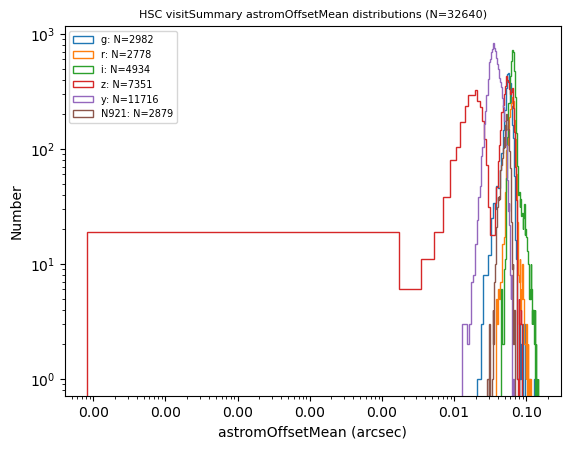

len(bandList): 6  nrows = 3


/sdf/group/rubin/sw/conda/envs/lsst-scipipe-6.0.0/lib/python3.10/site-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


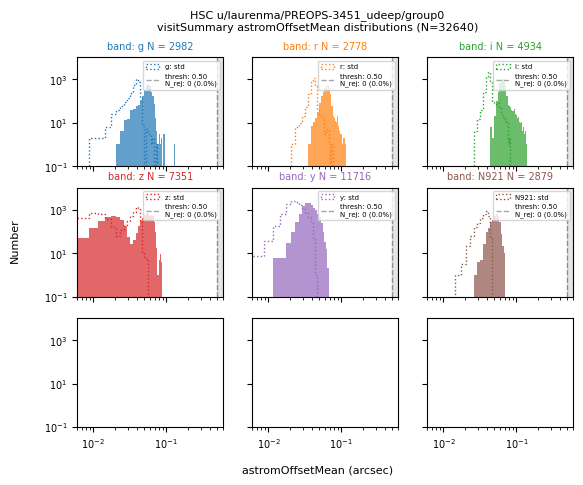

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_astromOffsetMeanHists_u_laurenma_PREOPS-3451_udeep_group0


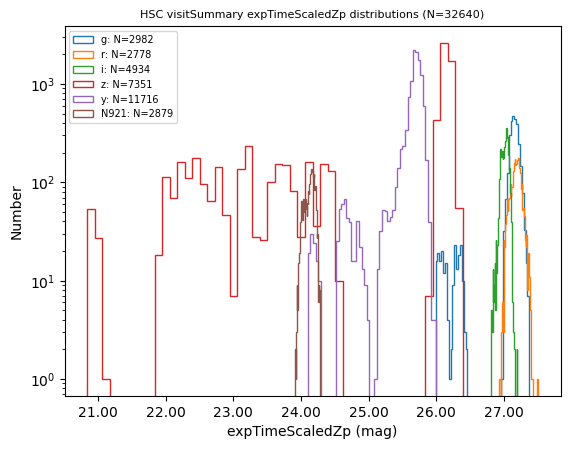

len(bandList): 6  nrows = 3


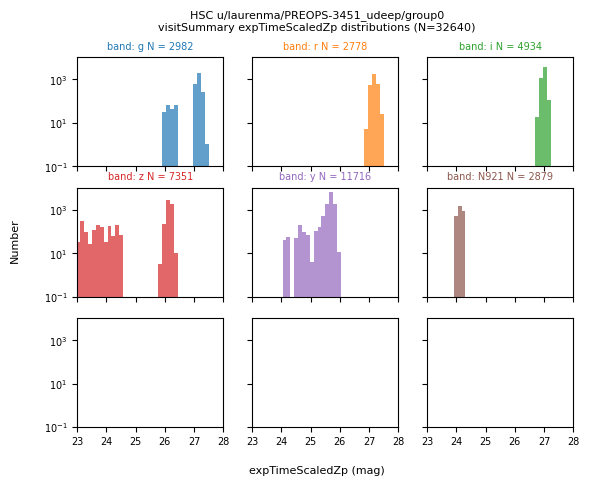

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_expTimeScaledZpHists_u_laurenma_PREOPS-3451_udeep_group0


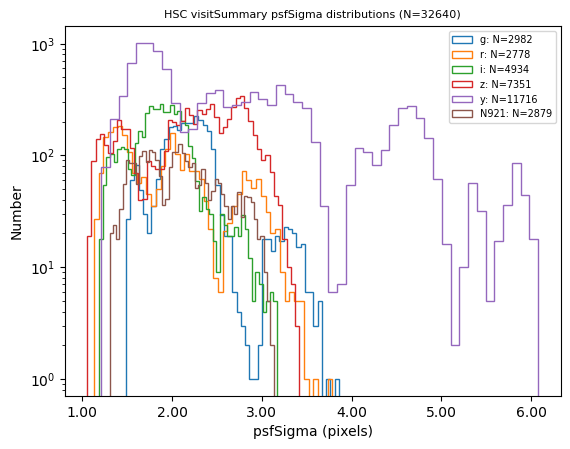

len(bandList): 6  nrows = 3
Don't have threshold for psfSigma
Don't have threshold for psfSigma
Don't have threshold for psfSigma
Don't have threshold for psfSigma
Don't have threshold for psfSigma
Don't have threshold for psfSigma


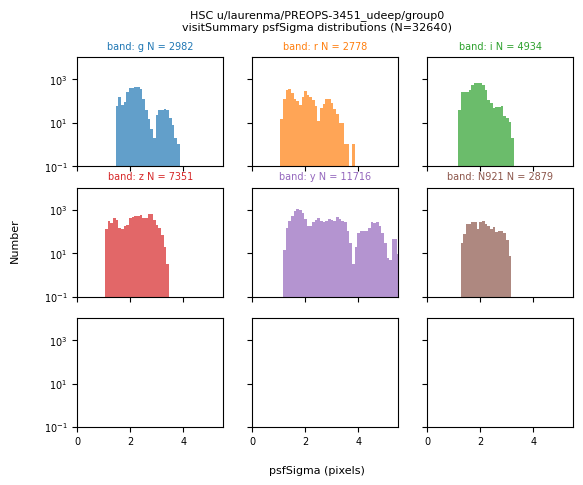

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_psfSigmaHists_u_laurenma_PREOPS-3451_udeep_group0


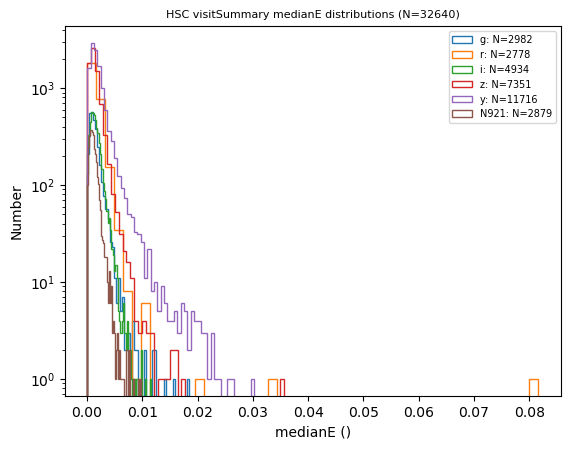

len(bandList): 6  nrows = 3


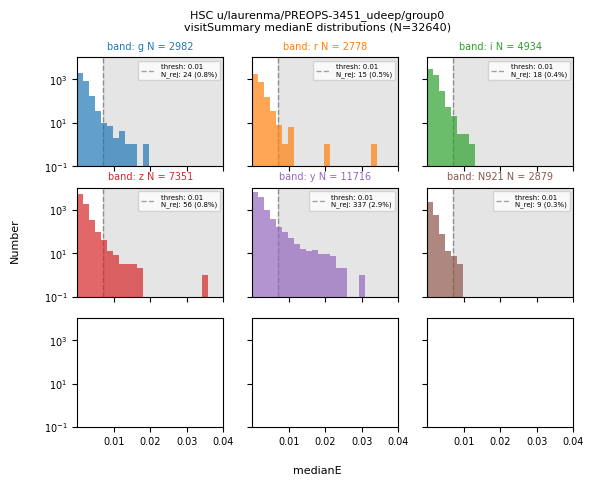

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_medianEHists_u_laurenma_PREOPS-3451_udeep_group0


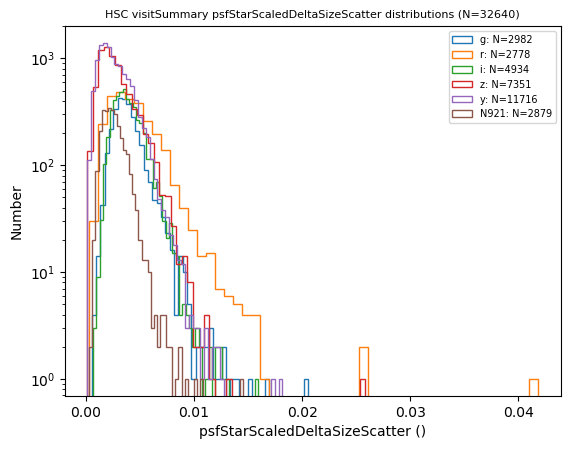

len(bandList): 6  nrows = 3


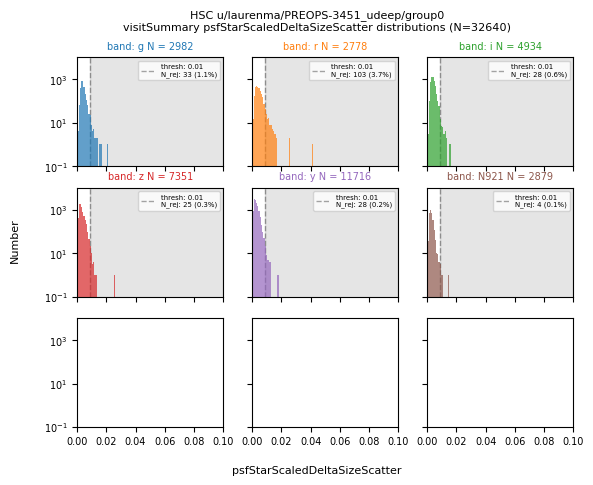

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_psfStarScaledDeltaSizeScatterHists_u_laurenma_PREOPS-3451_udeep_group0


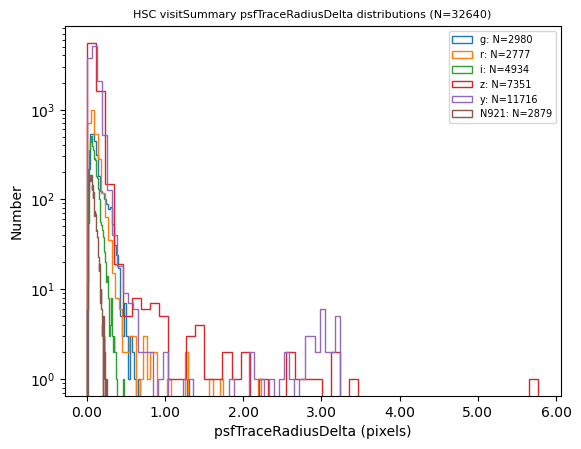

len(bandList): 6  nrows = 3


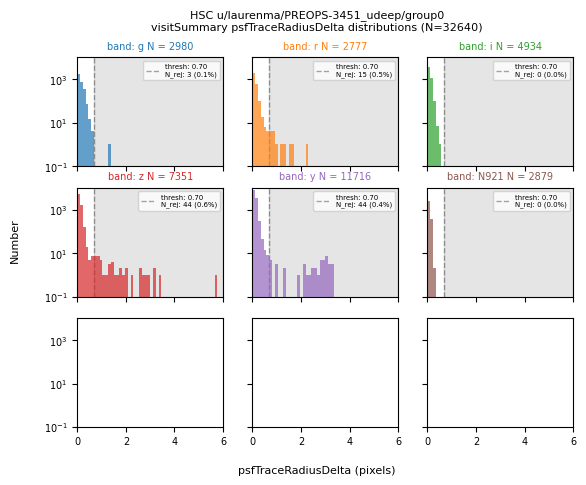

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_psfTraceRadiusDeltaHists_u_laurenma_PREOPS-3451_udeep_group0


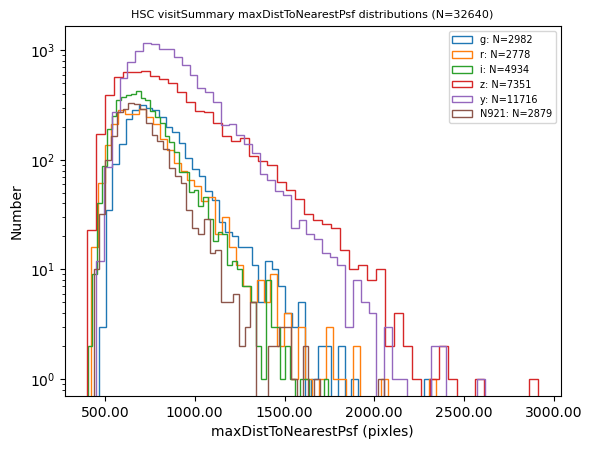

len(bandList): 6  nrows = 3


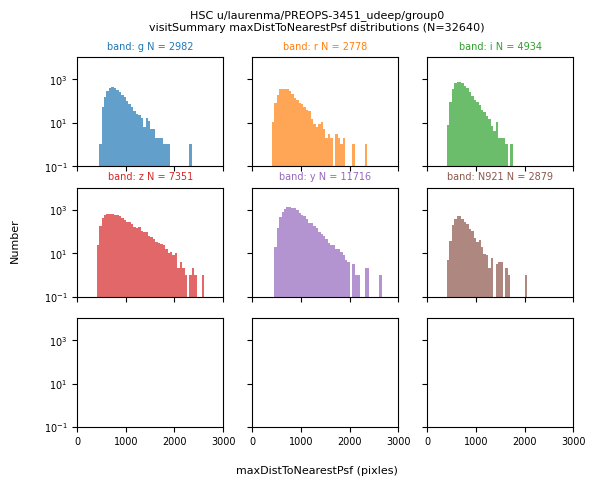

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_maxDistToNearestPsfHists_u_laurenma_PREOPS-3451_udeep_group0
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_astromOffsetMeanVsastromOffsetStd_u_laurenma_PREOPS-3451_udeep_group0.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_visitVsexpTimeScaledZp_u_laurenma_PREOPS-3451_udeep_group0.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_visitVspsfSigma_u_laurenma_PREOPS-3451_udeep_group0.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_visitVsskyBg_u_laurenma_PREOPS-3451_udeep_group0.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_detectorVsastromOffsetMean_u_laurenma_PREOPS-3451_udeep_group0.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_zenithDistanceVsastromOffsetMean_u_laurenma_PREOPS-3

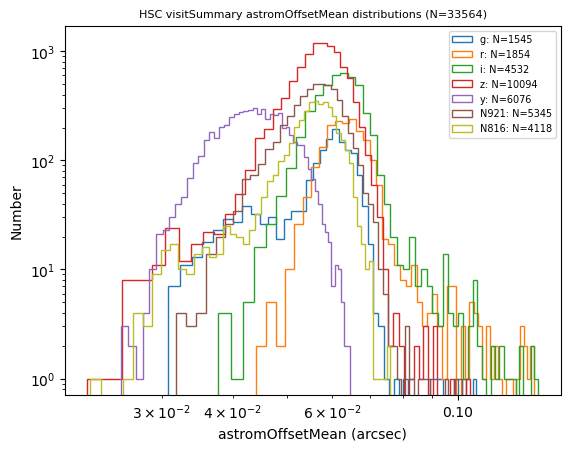

len(bandList): 7  nrows = 3


/sdf/group/rubin/sw/conda/envs/lsst-scipipe-6.0.0/lib/python3.10/site-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


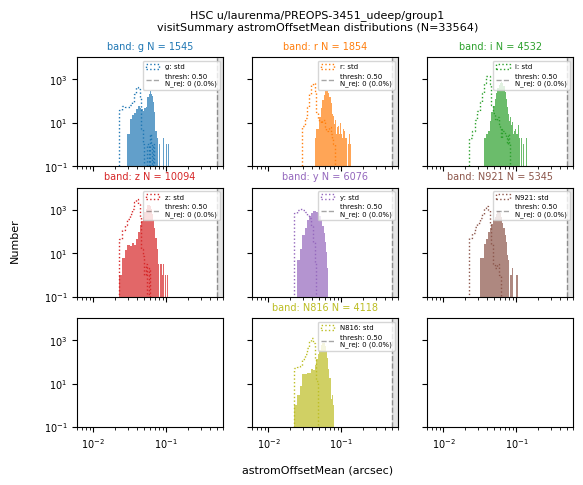

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_astromOffsetMeanHists_u_laurenma_PREOPS-3451_udeep_group1


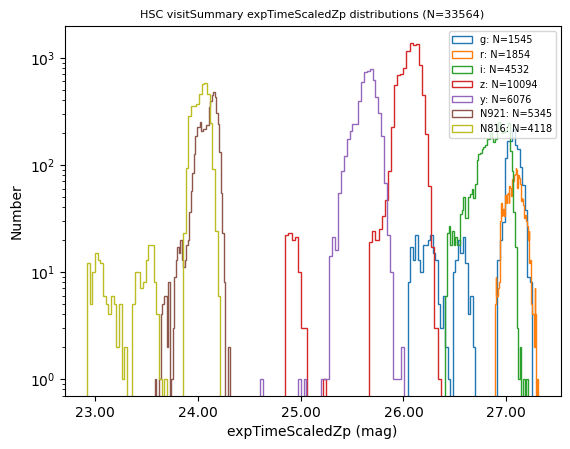

len(bandList): 7  nrows = 3


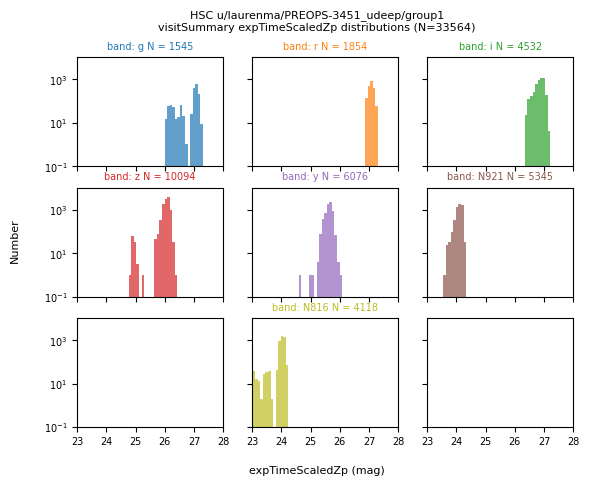

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_expTimeScaledZpHists_u_laurenma_PREOPS-3451_udeep_group1


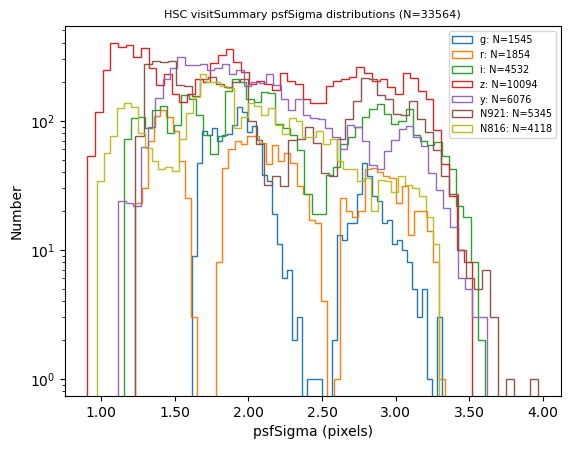

len(bandList): 7  nrows = 3
Don't have threshold for psfSigma
Don't have threshold for psfSigma
Don't have threshold for psfSigma
Don't have threshold for psfSigma
Don't have threshold for psfSigma
Don't have threshold for psfSigma
Don't have threshold for psfSigma


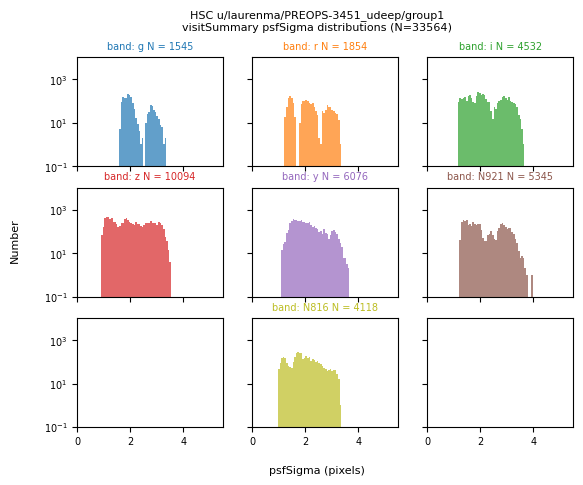

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_psfSigmaHists_u_laurenma_PREOPS-3451_udeep_group1


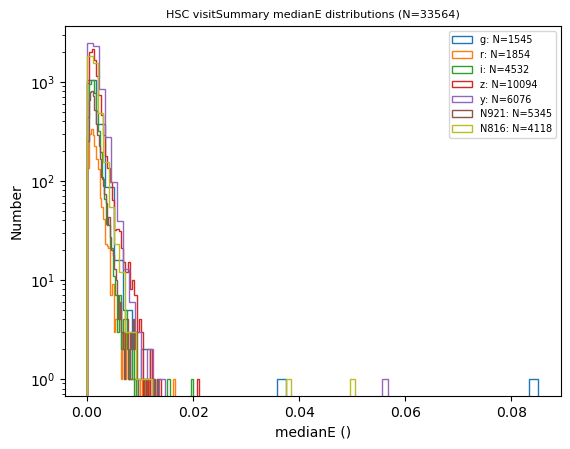

len(bandList): 7  nrows = 3


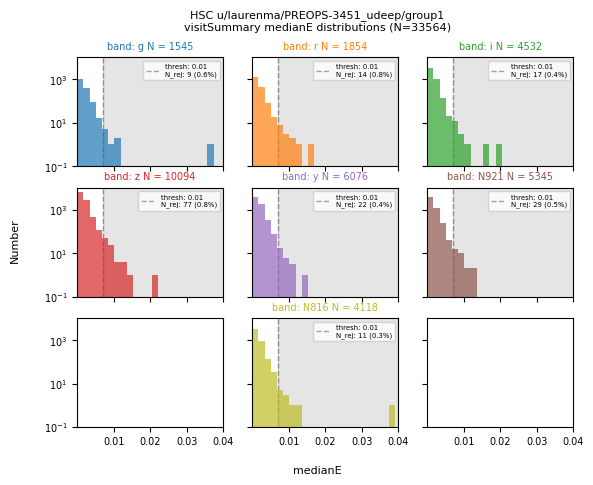

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_medianEHists_u_laurenma_PREOPS-3451_udeep_group1


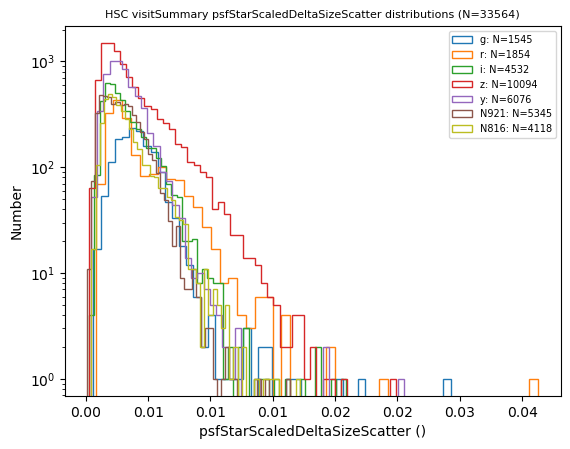

len(bandList): 7  nrows = 3


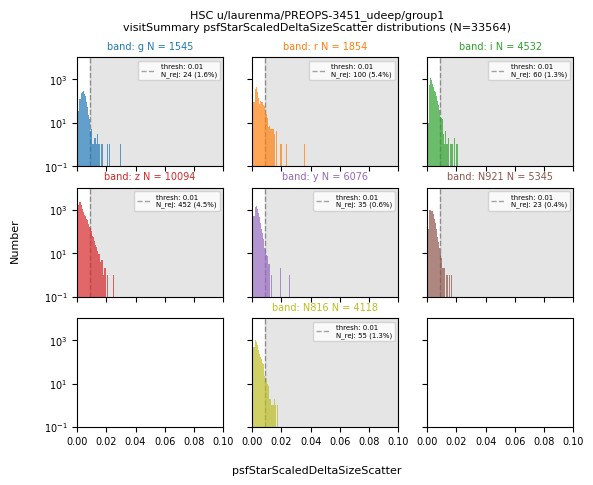

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_psfStarScaledDeltaSizeScatterHists_u_laurenma_PREOPS-3451_udeep_group1


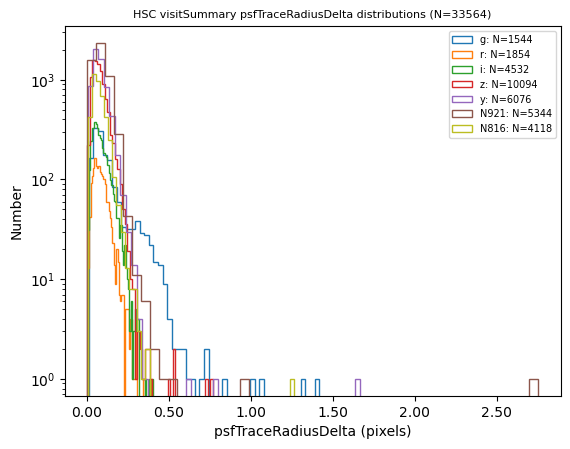

len(bandList): 7  nrows = 3


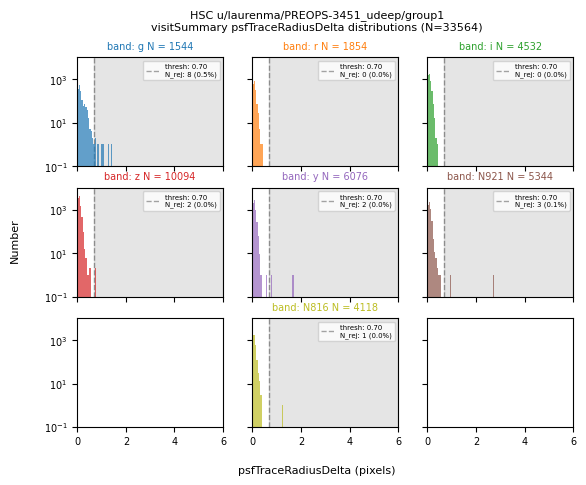

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_psfTraceRadiusDeltaHists_u_laurenma_PREOPS-3451_udeep_group1


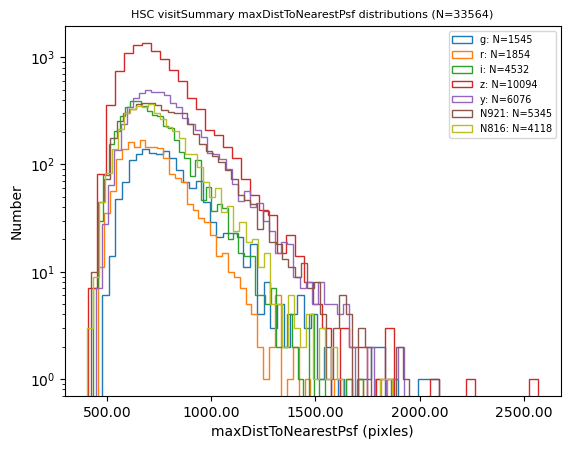

len(bandList): 7  nrows = 3


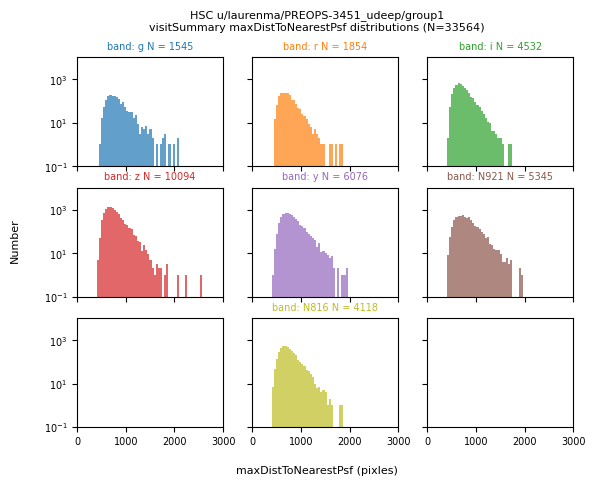

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_maxDistToNearestPsfHists_u_laurenma_PREOPS-3451_udeep_group1
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_astromOffsetMeanVsastromOffsetStd_u_laurenma_PREOPS-3451_udeep_group1.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_visitVsexpTimeScaledZp_u_laurenma_PREOPS-3451_udeep_group1.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_visitVspsfSigma_u_laurenma_PREOPS-3451_udeep_group1.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_visitVsskyBg_u_laurenma_PREOPS-3451_udeep_group1.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_detectorVsastromOffsetMean_u_laurenma_PREOPS-3451_udeep_group1.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_zenithDistanceVsastromOffsetMean_u_laurenma_PREOPS-3

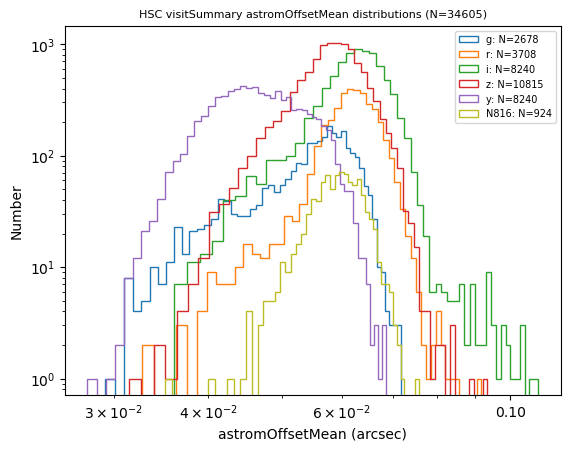

len(bandList): 6  nrows = 3


/sdf/group/rubin/sw/conda/envs/lsst-scipipe-6.0.0/lib/python3.10/site-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


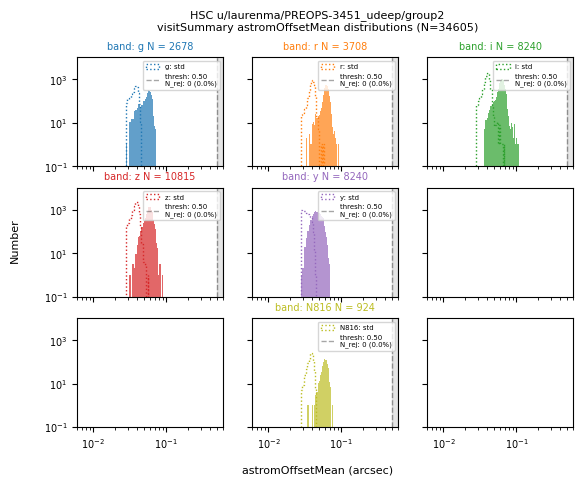

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_astromOffsetMeanHists_u_laurenma_PREOPS-3451_udeep_group2


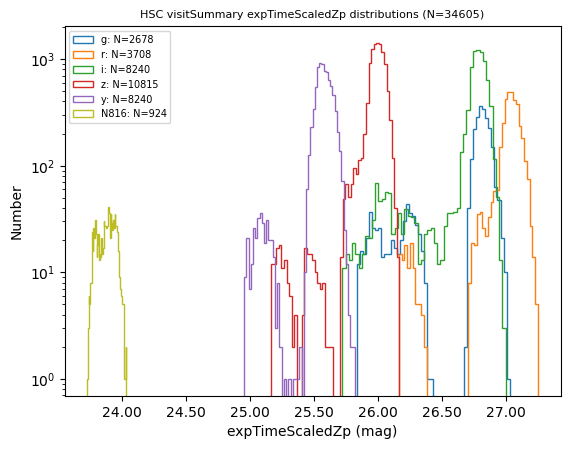

len(bandList): 6  nrows = 3


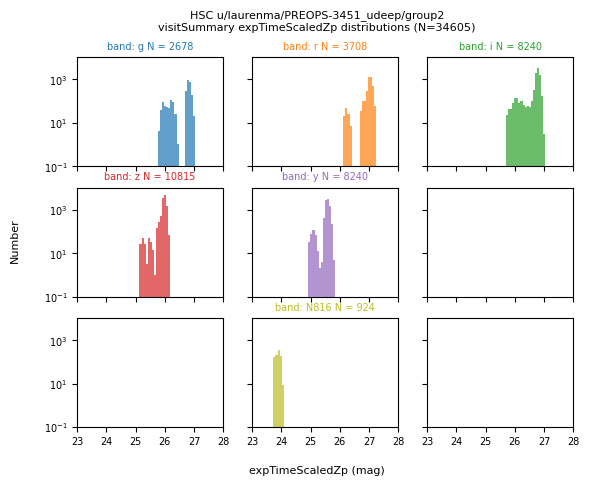

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_expTimeScaledZpHists_u_laurenma_PREOPS-3451_udeep_group2


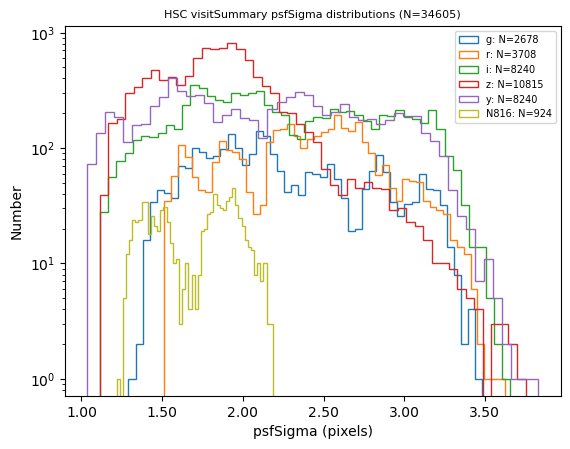

len(bandList): 6  nrows = 3
Don't have threshold for psfSigma
Don't have threshold for psfSigma
Don't have threshold for psfSigma
Don't have threshold for psfSigma
Don't have threshold for psfSigma
Don't have threshold for psfSigma


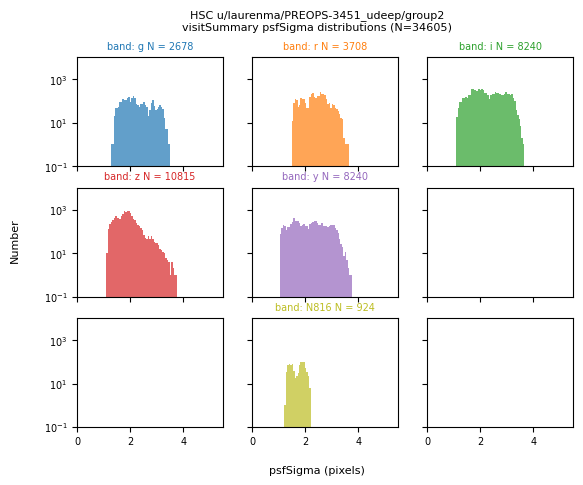

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_psfSigmaHists_u_laurenma_PREOPS-3451_udeep_group2


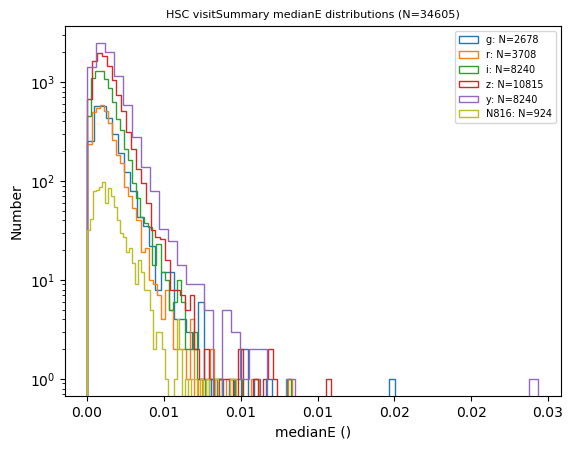

len(bandList): 6  nrows = 3


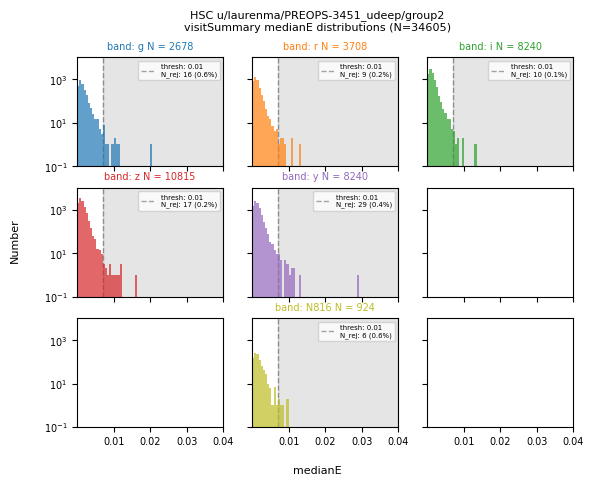

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_medianEHists_u_laurenma_PREOPS-3451_udeep_group2


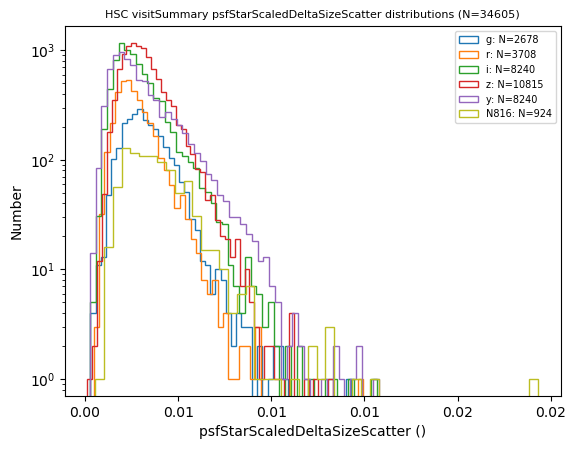

len(bandList): 6  nrows = 3


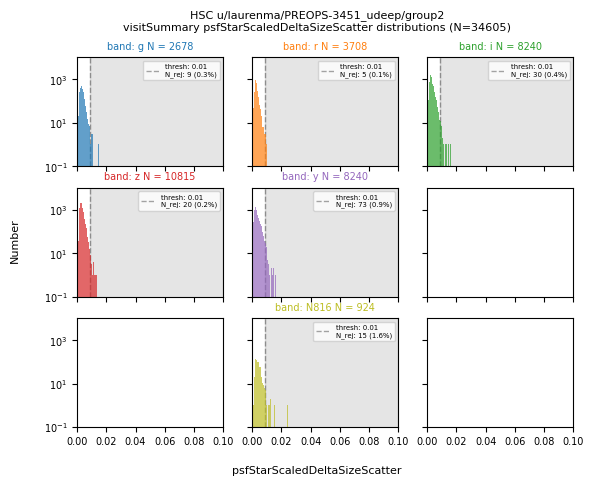

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_psfStarScaledDeltaSizeScatterHists_u_laurenma_PREOPS-3451_udeep_group2


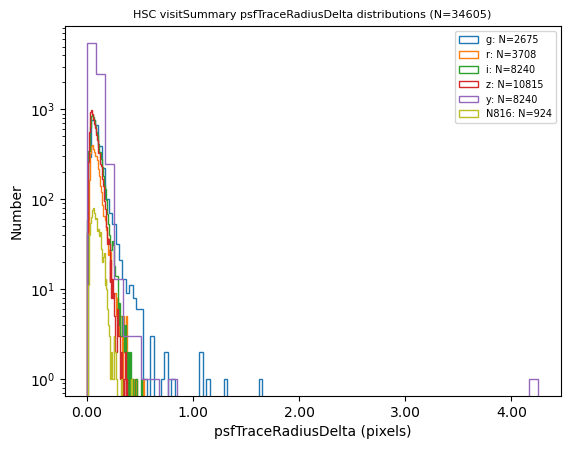

len(bandList): 6  nrows = 3


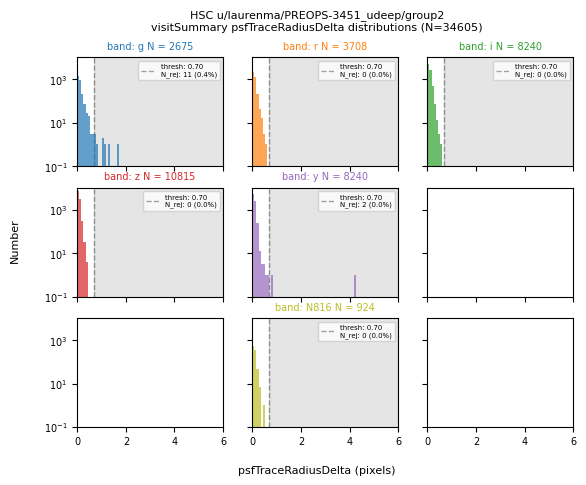

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_psfTraceRadiusDeltaHists_u_laurenma_PREOPS-3451_udeep_group2


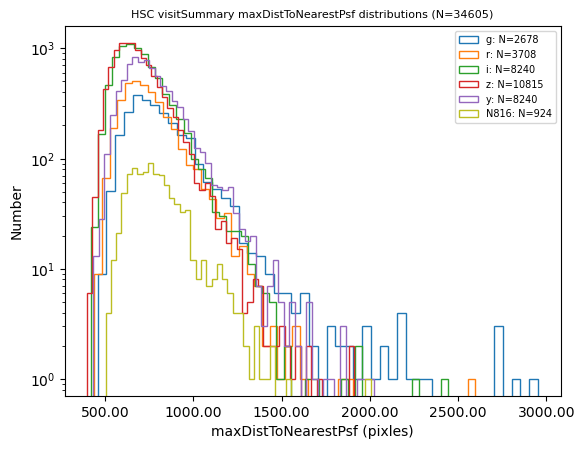

len(bandList): 6  nrows = 3


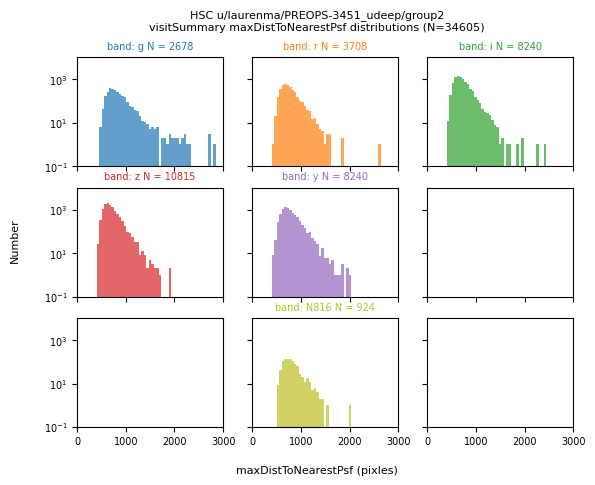

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_maxDistToNearestPsfHists_u_laurenma_PREOPS-3451_udeep_group2
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_astromOffsetMeanVsastromOffsetStd_u_laurenma_PREOPS-3451_udeep_group2.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_visitVsexpTimeScaledZp_u_laurenma_PREOPS-3451_udeep_group2.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_visitVspsfSigma_u_laurenma_PREOPS-3451_udeep_group2.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_visitVsskyBg_u_laurenma_PREOPS-3451_udeep_group2.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_detectorVsastromOffsetMean_u_laurenma_PREOPS-3451_udeep_group2.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_zenithDistanceVsastromOffsetMean_u_laurenma_PREOPS-3

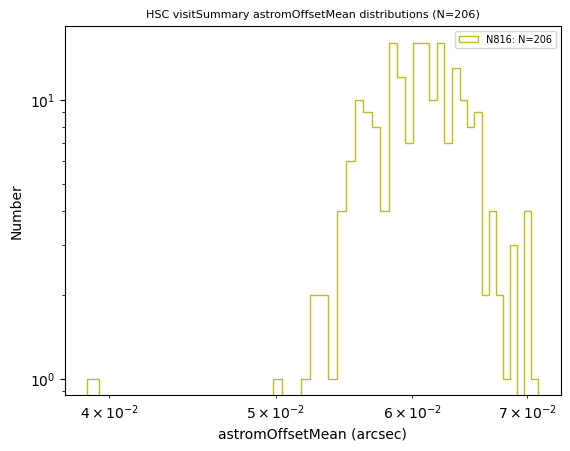

len(bandList): 1  nrows = 3


/sdf/group/rubin/sw/conda/envs/lsst-scipipe-6.0.0/lib/python3.10/site-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


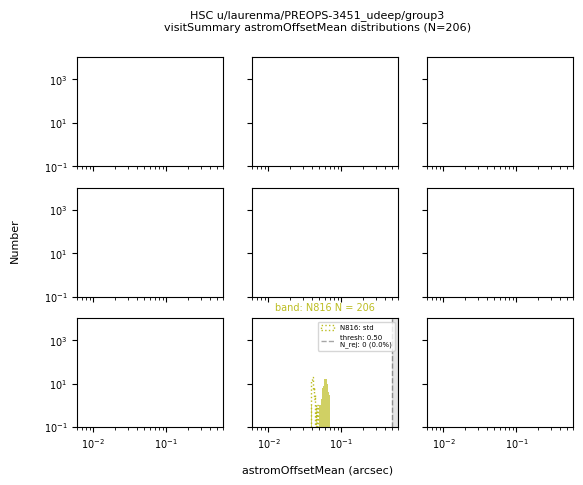

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_astromOffsetMeanHists_u_laurenma_PREOPS-3451_udeep_group3


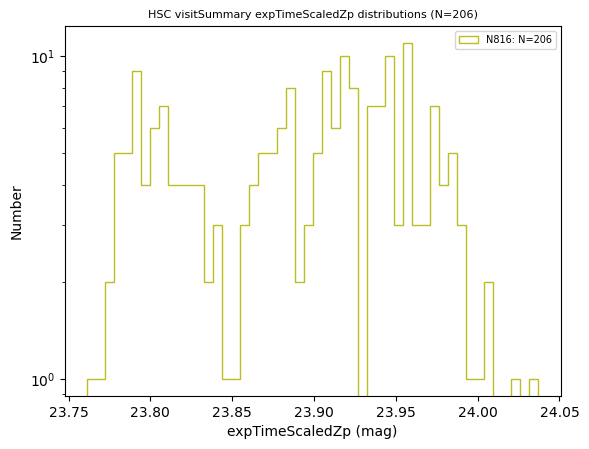

len(bandList): 1  nrows = 3


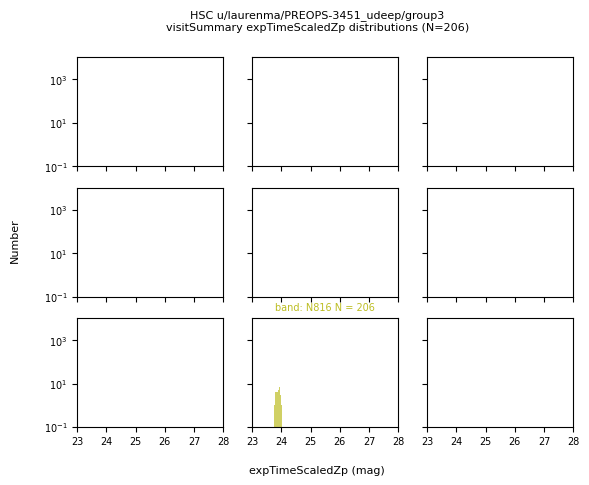

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_expTimeScaledZpHists_u_laurenma_PREOPS-3451_udeep_group3


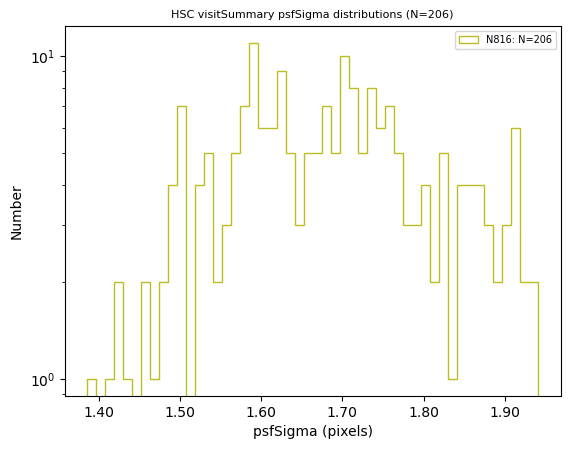

len(bandList): 1  nrows = 3
Don't have threshold for psfSigma


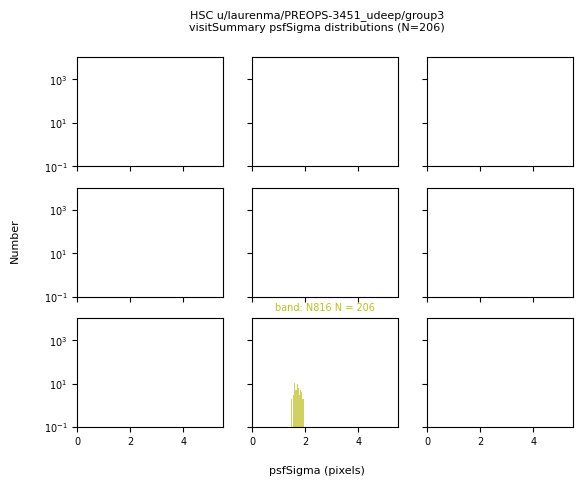

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_psfSigmaHists_u_laurenma_PREOPS-3451_udeep_group3


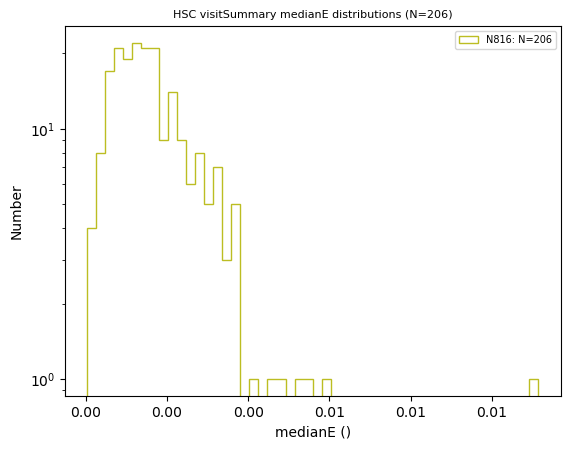

len(bandList): 1  nrows = 3


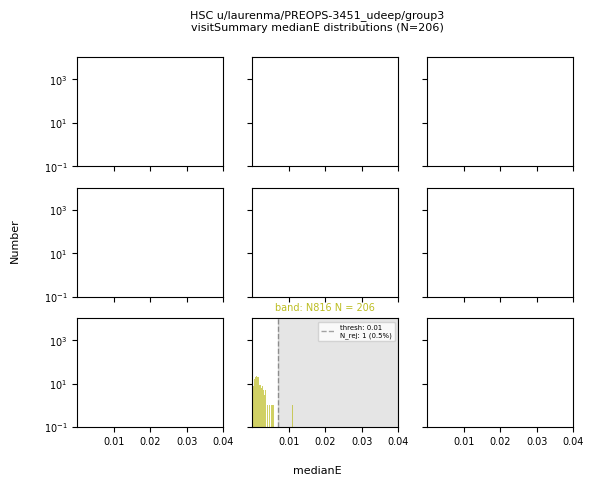

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_medianEHists_u_laurenma_PREOPS-3451_udeep_group3


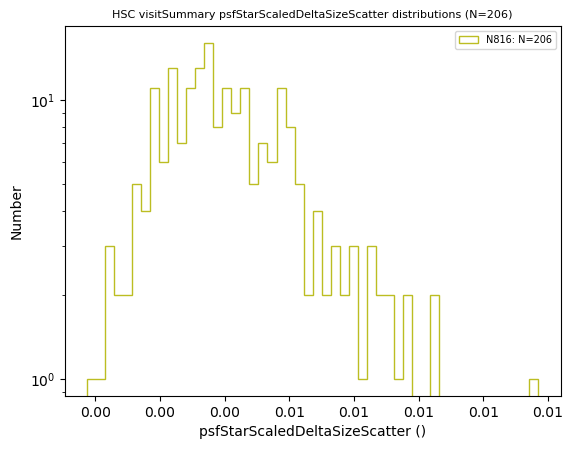

len(bandList): 1  nrows = 3


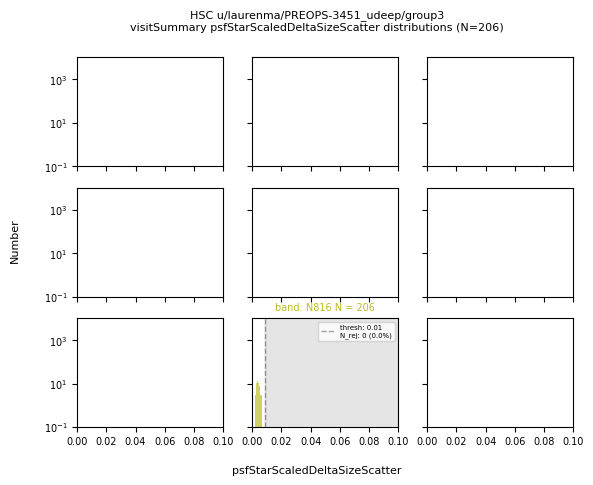

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_psfStarScaledDeltaSizeScatterHists_u_laurenma_PREOPS-3451_udeep_group3


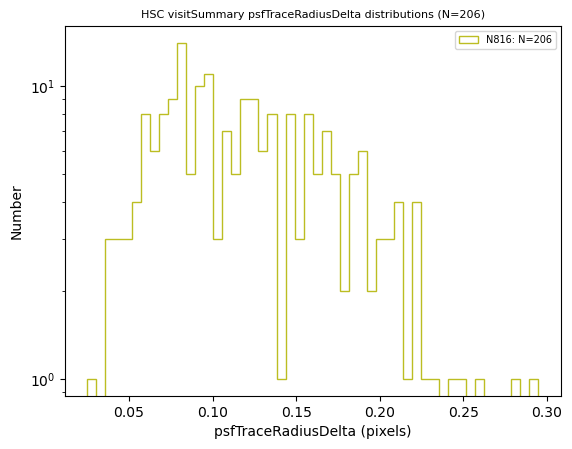

len(bandList): 1  nrows = 3


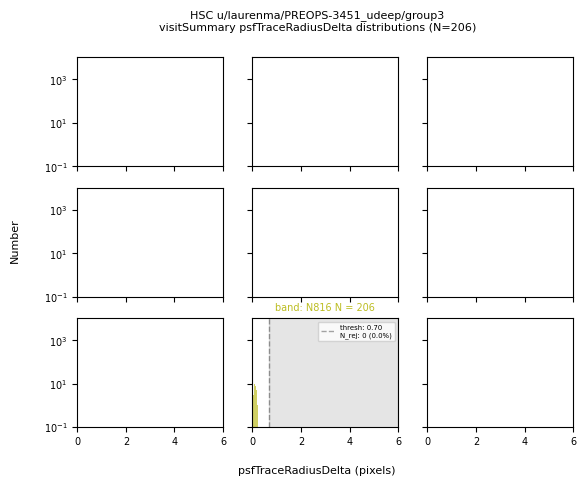

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_psfTraceRadiusDeltaHists_u_laurenma_PREOPS-3451_udeep_group3


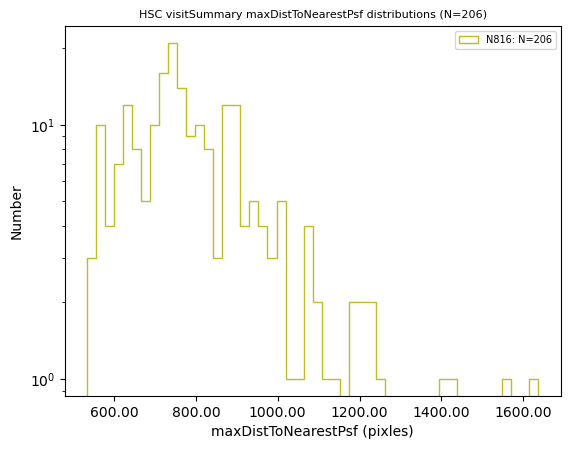

len(bandList): 1  nrows = 3


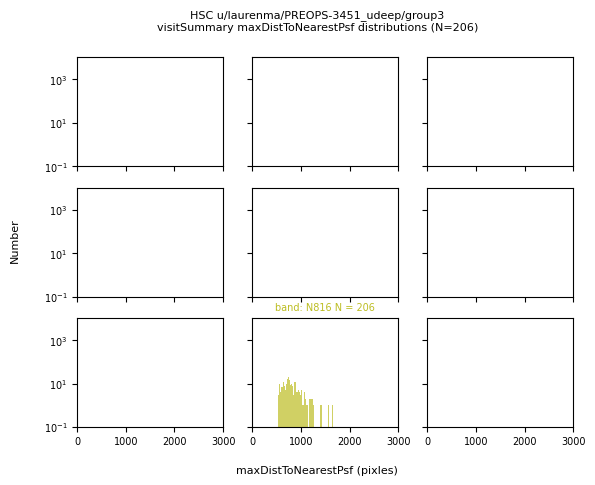

Saving file in: /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_maxDistToNearestPsfHists_u_laurenma_PREOPS-3451_udeep_group3
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_astromOffsetMeanVsastromOffsetStd_u_laurenma_PREOPS-3451_udeep_group3.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_visitVsexpTimeScaledZp_u_laurenma_PREOPS-3451_udeep_group3.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_visitVspsfSigma_u_laurenma_PREOPS-3451_udeep_group3.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_visitVsskyBg_u_laurenma_PREOPS-3451_udeep_group3.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_detectorVsastromOffsetMean_u_laurenma_PREOPS-3451_udeep_group3.html
Saving /sdf/home/l/laurenma/public_html/PREOPS-3451/longOnly/histogramPlots/HSC_zenithDistanceVsastromOffsetMean_u_laurenma_PREOPS-3

In [21]:
# HSC PDR2 UDEEP step1 + consolidateVisitSummary groupN
groupStrList = ["0", "1", "2", "3"]
for groupStr in groupStrList:
    collection = "u/laurenma/PREOPS-3451_udeep/group{}".format(groupStr)
    collectionStr = collection.replace("/", "_")
    doIt(collection, cameraCollection, collectionStr, plotDir)

Execute all subsequent cells before those noted above.

In [4]:
def doIt(collection, cameraCollection, collectionStr, plotDir, badSeeingOnly=False):
    print("Creating butler for {} from {} for collection\n{}".format(instrument, butlerRoot, collection))
    butler = Butler(butlerRoot, collections=collection, instrument=instrument,
                    skymap=skyMap)
    camera = butler.get("camera", instrument=instrument, collections=cameraCollection)

    threshStruct = introspectConfigs(butler, instrument)
    visitDataAll, dataSourceStr = loadVisitData(butler, camera)
    # Print the first three rows of the table just to have a look what's in it
    print(visitDataAll[:3])
    nDataId = len(visitDataAll)
    visitList = list(set(visitDataAll["visit"]))
    nVisit = len(visitList)
    print("Number of dataIds: {}  Number of visits: {} (average of {} detectors per visit)".
          format(nDataId, nVisit, int(nDataId/nVisit)))
    
    # Make a sorted list of the bands that actually exist
    bandList = list(set(visitDataAll["band"]))
    bandList = [band for band in sortedFullBandList if band in bandList]
    print("Sorted list of existing bands: {}".format(bandList))
    plt.close("all")
    # Set the max number of data points for which to make interactive html plots.
    # If the number of data points is greater than this, only static pngs will be made.
    nDataHtmlMax = 50000
    fileExtentionList = ["png"] if nDataId > nDataHtmlMax else ["html", "png"]

    if True:
        for fileExtention in fileExtentionList:
            makeParameterCompBokehPlots(
                visitDataAll, fileExtention, collection=collection,
                collectionStr=collectionStr, dataSourceStr=dataSourceStr,
                plotDir=plotDir, bandList=bandList, threshStruct=threshStruct)
    if True:
        for fileExtention in fileExtentionList:
            for projStr in ["raDec", "focalPlane"]:
                makeProjectionBokehPlots(
                    camera,
                    visitDataAll, fileExtention, collection=collection,
                    collectionStr=collectionStr, dataSourceStr=dataSourceStr,
                    plotDir=plotDir, bandList=bandList, threshStruct=threshStruct,
                    projStr=projStr)

    xHistStrList = ["astromOffsetMean", "expTimeScaledZp", "psfSigma", "medianE",
                    "psfStarScaledDeltaSizeScatter", "psfTraceRadiusDelta",
                    "maxDistToNearestPsf"]
    if True:
        for xCol in xHistStrList:
            makeHistPerBandStaticPlots(camera, visitDataAll, collectionStr, bandList, xCol, threshStruct)
    if True:
        # Make scatter + histogrom bokeh plots
        xColList = ["astromOffsetMean", "visit", "visit", "visit", "detector", "zenithDistance"]  # , "psfTraceRadiusDelta"]
        yColList = ["astromOffsetStd", "expTimeScaledZp", "psfSigma", "skyBg", "astromOffsetMean", "astromOffsetMean"]  # , "maxDistToNearestPsf"]
        for xCol, yCol in zip(xColList, yColList):
            plotScatHist(visitDataAll, collectionStr, dataSourceStr, bandList, xCol, yCol, threshStruct)

In [5]:
# Set some unit and axis scaling dictionaries for specific parameters
bandColorDict = {"g": "#1f77b4", "r": "#ff7f0e", "i": "#2ca02c", "z": "#d62728",
                 "y": "#9467bd", "N921": "#8c564b", "N387": "#e377c2",  # "": "#7f7f7f",
                 "N816": "#bcbd22", "u": "#17becf"}

unitsDict = dict(astromOffsetMean="arcsec", astromOffsetStd="arcsec", psfSigma="pixels",
                 skyBg="counts", skyNoise="counts", visit="number", detector="number",
                 zenithDistance="degrees", zeroPoint="mag", expTimeScaledZp="mag",
                 ra="degrees", decl="degrees",
                 xFp="mm", yFp="mm", medianE="", psfStarScaledDeltaSizeScatter="",
                 rawExistsStr="", psfTraceRadiusDelta="pixels",
                 maxDistToNearestPsf="pixles")

axisScaleDict = dict(astromOffsetMean="log", astromOffsetStd="log", psfSigma="linear",
                     skyBg="linear", skyNoise="linear", visit="linear", detector="linear",
                     zenithDistance="linear", zeroPoint="linear", expTimeScaledZp="linear",
                     ra="linear", decl="linear", xFp="linear", yFp="linear",
                     medianE="linear", psfStarScaledDeltaSizeScatter="linear", 
                     psfTraceRadiusDelta="linear", maxDistToNearestPsf="linear")

xAxisLimitsDict = dict(astromOffsetMean=(0.006, 0.6), astromOffsetStd=(0.006, 0.6),
                       psfSigma=(0.0, 5.5), skyBg=None, skyNoise=None, visit=None,
                       detector=None, zenithDistance=(0.0, 90.0), 
                       zeroPoint=(27.0, 34.0), expTimeScaledZp=(23.0, 28.0),
                       medianE=(0.00002, 0.04), psfStarScaledDeltaSizeScatter=(0, 0.1),
                       psfTraceRadiusDelta=(0.0, 6.0), maxDistToNearestPsf=(0.0, 3000.0))

In [6]:
# Set some parameter defaults for Bokeh plotting
nBins = 50
plotWidth = 350
color = "teal"
histColor = "teal"
lineColors = ["black", "white"]
hoverColor = "cyan"
nonSelectColor = "silver"
bandMarkerDict = {
    "g": "star", "r": "circle", "i": "square", "z": "hex", "y": "triangle",
    "u": "diamond", "N921": "plus", "N387": "square_pin", "N816": "triangle_pin"}
# bandMarkers = ["star", "circle", "square", "hex", "circle_x", "triangle"]

In [7]:
def introspectConfigs(butler, instrument):

    # Can't introspect from configs yet...
    if instrument == "LSSTCam-imSim":
        maxMeanDistanceArcsec = 0.05
        maxEllipResidual = 0.0045
        maxScaledSizeScatter = 0.006
        maxPsfTraceRadiusDelta = 0.7
    elif instrument == "LATISS":
        maxMeanDistanceArcsec = 0.05
        maxEllipResidual = 0.1
        maxScaledSizeScatter = 0.012
        maxPsfTraceRadiusDelta = 4.8
    elif instrument == "HSC":
        maxMeanDistanceArcsec = 0.5
        maxEllipResidual = 0.007
        maxScaledSizeScatter = 0.009
        maxPsfTraceRadiusDelta = 0.7
    
    if False:
        # Introspect config value from persisted configs.
        calibrateConfigDatarefList = list(butler.registry.queryDatasets("calibrate_config"))
        calibConfigFile = butler.get(calibrateConfigDatarefList[0])
        maxMeanDistanceArcsec = calibConfigFile.astrometry.maxMeanDistanceArcsec
    print("maxMeanDistanceArcsec = {}".format(maxMeanDistanceArcsec))
    if False:  # Step 3 hasn't finished running yet
        makeWarpConfigDatarefList = list(butler.registry.queryDatasets("makeWarp_config"))
        makeWarpConfigFile = butler.get(makeWarpConfigDatarefList[0])
        maxEllipResidual = makeWarpConfigFile.select.maxEllipResidual
        maxScaledSizeScatter = makeWarpConfigFile.select.maxScaledSizeScatter
    print("maxEllipResidual = {}".format(maxEllipResidual))
    print("maxScaledSizeScatter = {}".format(maxScaledSizeScatter))
    return Struct(
        maxMeanDistanceArcsec=maxMeanDistanceArcsec,
        maxEllipResidual=maxEllipResidual,
        maxScaledSizeScatter=maxScaledSizeScatter,
        maxPsfTraceRadiusDelta=maxPsfTraceRadiusDelta,
    )

In [8]:
def loadVisitData(butler, camera):
    # Figure out if ccdVisitTable datasets exist.  If not, load visitSummary tables.
    doLoadCcdVisitTables, doLoadVisitSummaries = False, False
    if doTryCcdVisitTable:
        try:
            butler.datasetExists("ccdVisitTable")
            doLoadCcdVisitTables = True
            dataSourceStr = "ccdVisitTable"
            print("Found ccdVisitTable dataset, so will load those...")
        except LookupError:
            doLoadVisitSummaries = True
            dataSourceStr = "visitSummary"
            print("Could not find ccdVisitTable dataset, so will load visitSummay tables...")
    else:
        doLoadVisitSummaries = True
        dataSourceStr = "visitSummary"
    if doLoadVisitSummaries:
        visitDataAll = loadVisitSummaries(butler)
    elif doLoadCcdVisitTables:
        visitDataAll = loadCcdVisitTables(butler)
    else:
        print("No visit table datasets found (looked for ccdVisitTable & visitSummay)")
    print("dataSourceStr = {}".format(dataSourceStr))
    if longOnly:
        visitDataAll = visitDataAll[visitDataAll["expTime"] > 40.0].copy()
        print("Limiting to long exposures (> 40sec).")
    elif shortOnly:
        visitDataAll = visitDataAll[visitDataAll["expTime"] <= 40.0].copy()
        print("Limiting to short exposures (<= 40sec).")
    else:
        print("Including all exposure times (long and short).")
    visitDataAll = addDetCenter(camera, visitDataAll)
    bandList = list(set(visitDataAll["band"]))
    bandList = [band for band in sortedFullBandList if band in bandList]

    return visitDataAll, dataSourceStr

In [9]:
# %%time
def loadVisitSummaries(butler):
    # Load and stack all visitSummary tables in repo collection
    # ONLY DOING THIS FOR LOOKING AT THE DATA PRE-ccdVisitTable CREATION
    visitSummaryRefList = list(butler.registry.queryDatasets("visitSummary"))
    nVisitCollection = len(visitSummaryRefList)
    print("Number of visits in collection {}: {}".format(collection, nVisitCollection))

    visitSummaryList = []
    # start_time = time.time()
    # current_time = time.time()
    nDigitVisit = len(str(nVisitCollection))
    maxNumVisit = nVisitCollection  # 500
    printInterval = min(int(maxNumVisit/2) + 1, max(50, int(maxNumVisit/100)))
    for iv, visitSummaryRef in enumerate(visitSummaryRefList[:maxNumVisit]):
        if False:  # np.mod(iv, printInterval) == 0:
            delta_time = current_time
            current_time = time.time()
            delta_time = current_time - delta_time
            elapsed_time = current_time - start_time
            print("At visit {:4d} [of {} max], elapsed time is: {:.2f} min "
                  "(time since last iteration: {:.2f} min)".
                  format(iv, maxNumVisit, elapsed_time/60, delta_time/60))
        visitSummary = butler.get(visitSummaryRef)
        expTime = visitSummary[0].getVisitInfo().exposureTime
        visitSummary = visitSummary.asAstropy()
        visitSummaryList.append(visitSummary)
        detector = visitSummary["id"][0]
        visit = visitSummaryRef.dataId["visit"]
        metaData = butler.get("calexp.metadata", visit=visit, detector=detector)
        expTimeMeta = (metaData["MJD-END"] - metaData["MJD-STR"])*24*3600
        expTimeAbsDiff = expTimeMeta - expTime
        expTimePercDiff = 0.5*100*expTimeAbsDiff/(expTimeMeta + expTime)
        # print("expTimeMeta = {:.2f} expTime = {:.2f} absDiff = {:.2f} %diff = {:.2f}".
        #       format(expTimeMeta, expTime, expTimeAbsDiff, expTimePercDiff))
        visitSummary["expTime"] = [expTime]*len(visitSummary)

    visitSummaryAll = vstack(visitSummaryList)
    visitSummaryAll["detector"] = visitSummaryAll["id"]
    havePsfStats = False
    if "psfStarDeltaE1Median" in visitSummaryAll.columns:
        print("visitSummary does contain PSF metrics")
        havePsfStats = True
    if havePsfStats:
        visitSummaryAll["medianE"] = np.sqrt(visitSummaryAll["psfStarDeltaE1Median"]**2.
                                             + visitSummaryAll["psfStarDeltaE2Median"]**2.)
    visitSummaryAll["expTimeScaledZp"] = visitSummaryAll["zeroPoint"] - 2.5*np.log10(visitSummaryAll["expTime"])
    # nDataId = len(visitSummaryAll)
    # nVisit = len(visitSummaryList)
    # print("Number of dataIds: {}  Number of visits: {} (average of {} detectors per visit)".
    #       format(nDataId, nVisit, int(nDataId/nVisit)))
    return visitSummaryAll

In [10]:
# Read in data from ccdVisitTable when available
def loadCcdVisitTables(butler):
    ccdVisitTable = butler.get("ccdVisitTable")
    ccdVisitTable["medianE"] = np.sqrt(ccdVisitTable["psfStarDeltaE1Median"]**2.
                                       + ccdVisitTable["psfStarDeltaE2Median"]**2.)
    ccdVisitTable["visit"] = ccdVisitTable["visitId"]
    return ccdVisitTable

In [11]:
def addDetCenter(camera, visitDataAll):
    # Add the detector center in Focal Plane coords to visitDataAll
    nDetectorCamera = len(camera)
    centerFpList = [camera[det].getCenter(FOCAL_PLANE) for det in visitDataAll["detector"]]
    xFpList = [centerFp[0] for centerFp in centerFpList]
    yFpList = [centerFp[1] for centerFp in centerFpList]
    visitDataAll["xFp"] = xFpList
    visitDataAll["yFp"] = yFpList
    return visitDataAll

In [12]:
def getCentralSixDetList(camera):
    xFp0, yFp0, iFact = 0.0, 0.0, 0.0
    centralDetList = []
    while len(centralDetList) < 1:
        centralDetList = camera.findDetectors(Point2D(xFp0 - iFact, yFp0), FOCAL_PLANE)
        iFact -= 2.0
    centralDet = centralDetList[0]
    (xFp0, yFp0) = centralDet.getCenter(FOCAL_PLANE)
    centralSixDetList = []
    for iw in [0, 1]:
        for ih in [-1, 0, 1]:
            xFp = xFp0 + iw*centralDet.getPixelSize()[0]*centralDet.getBBox().getWidth()
            yFp = yFp0 + ih*centralDet.getPixelSize()[1]*centralDet.getBBox().getHeight()
            detList = camera.findDetectors(Point2D(xFp, yFp), FOCAL_PLANE)
            centralSixDetList.append(detList[0].getId())
    if len(centralSixDetList) != 6:
        raise("Trouble finding centralSixDetList...") 
    print("centralSixDetList = {}".format(centralSixDetList))
    return centralSixDetList

In [13]:
def addMeanCentralPsfSigma(visitDataAll, centralDetList):
    meanPsfSigmaDict = {}
    visitList = list(set(visitDataAll["visit"]))
    for visit in visitList:
        psfSigmaSum = 0.0
        visitDets = visitDataAll[visitDataAll["visit"] == visit].copy()
        nDet = 0
        for det in centralDetList:
            visitDet = visitDets[visitDets["detector"] == det]
            if len(visitDet) > 0:
                nDet += 1
                psfSigmaSum += visitDet["psfSigma"][0]
        if nDet > 0:
            meanPsfSigma = psfSigmaSum/nDet
        else:
            print("No central detectors found for visit {}.  Seetin meanPsfSima to NaN".
                  format(visit))
            meanPsfSigma = np.nan
        meanPsfSigmaDict[visit] = meanPsfSigma
    meanPsfSigmaList = [meanPsfSigmaDict[visit] for visit in visitDataAll["visit"]]
    visitDataAll["meanPsfSigma"] = meanPsfSigmaList
    return visitDataAll

In [14]:
# Function to create a column data source for the plots to share
def getSource(dataTable, xColList, yColList, zColList=None, detectorStr="detector",
              bandList=None):
    # Sort by order in bandList for legend consistency
    if bandList is not None:
        if isinstance(dataTable, Table):
            dataTable.remove_columns(["raCorners", "decCorners"])
            dataTable = dataTable.to_pandas()
        bandOrder = pd.api.types.CategoricalDtype(bandList, ordered=True)
        dataTable["band"] = dataTable["band"].astype(bandOrder)
        dataTable = dataTable.sort_values("band")
        # dataTable = Table.from_pandas(dataTable)

    dataDict = dict(visit=dataTable["visit"], detector=dataTable[detectorStr],
                    band=dataTable["band"])
    for xCol, yCol in zip(xColList, yColList):
        dataDict[xCol] = dataTable[xCol]
        dataDict[yCol] = dataTable[yCol]
    if zColList:
        for zCol in zColList:
            dataDict[zCol] = dataTable[zCol]
    source = ColumnDataSource(data=dataDict)
    return source

In [15]:
# Create a custom hover tool on both panels
def createBokehTools(TOOLTIPS_LIST, MENU_TOOLS):
    HOVER_TOOL = HoverTool(tooltips=TOOLTIPS_LIST)
    BOKEH_TOOLS = [MENU_TOOLS, HOVER_TOOL] # custom_hover
    return BOKEH_TOOLS

In [16]:
def addBokehThresholds(xCol, yCol, bokehPlot, threshStruct):
    threshKwargs = dict(line_color="dimgray", line_width=2, line_dash=(10, 5))
    if xCol == "astromOffsetMean":
        parThresh = Span(dimension="height",
                            location=threshStruct.maxMeanDistanceArcsec, **threshKwargs)
        bokehPlot.add_layout(parThresh)
        threshBox = BoxAnnotation(left=threshStruct.maxMeanDistanceArcsec,
                                  fill_alpha=0.05, fill_color="black")
        bokehPlot.add_layout(threshBox)
    if yCol == "astromOffsetMean":
        parThresh = Span(dimension="width",
                            location=threshStruct.maxMeanDistanceArcsec, **threshKwargs)
        bokehPlot.add_layout(parThresh)
        threshBox = BoxAnnotation(bottom=threshStruct.maxMeanDistanceArcsec,
                                  fill_alpha=0.05, fill_color="black")
        bokehPlot.add_layout(threshBox) 
    if yCol == "medianE":
        parThresh = Span(dimension="width",
                            location=threshStruct.maxEllipResidual, **threshKwargs)
        bokehPlot.add_layout(parThresh)
        threshBox = BoxAnnotation(bottom=threshStruct.maxEllipResidual,
                                  fill_alpha=0.06, fill_color="black")
        bokehPlot.add_layout(threshBox)
    if yCol == "psfStarScaledDeltaSizeScatter":
        parThresh = Span(dimension="width",
                            location=threshStruct.maxScaledSizeScatter, **threshKwargs)
        bokehPlot.add_layout(parThresh)
        threshBox = BoxAnnotation(bottom=threshStruct.maxScaledSizeScatter,
                                  fill_alpha=0.06, fill_color="black")
        bokehPlot.add_layout(threshBox)
    if xCol == "psfTraceRadiusDelta":
        parThresh = Span(dimension="height",
                         location=threshStruct.maxPsfTraceRadiusDelta, **threshKwargs)
        bokehPlot.add_layout(parThresh)
        threshBox = BoxAnnotation(left=threshStruct.maxPsfTraceRadiusDelta,
                                  fill_alpha=0.05, fill_color="black")
        bokehPlot.add_layout(threshBox)

    return bokehPlot

In [17]:
# Create figure of various parameter vs. parameter scatter plots.
# If number of data points is not too large (>~50000?) create a
# linked 3x3 grid (doAddTools == True), otherwise persist as a
# static png.
def makeParameterCompBokehPlots(visitDataAll, fileExtention, collection, collectionStr,
                                dataSourceStr, plotDir, bandList, threshStruct):
    palette = [bandColorDict[band] for band in bandList]
    index_cmap = factor_cmap("band", palette=palette, factors=bandList)
    bandMarkers = [bandMarkerDict[band] for band in bandList]
    index_mark = factor_mark("band", bandMarkers, bandList)

    nDataId = len(visitDataAll)
    visitList = list(set(visitDataAll["visit"]))
    nVisit = len(visitList)

    if fileExtention == "html":
        print("Creating interactive standalone html plot (nData = {}).".format(nDataId))
    else:
        print("Creating static png plot (nData = {})".format(nDataId))
    plotWidth = 520  # 320

    xColList = ["astromOffsetMean", "zenithDistance", "skyBg", "zenithDistance", "detector", "visit", "psfSigma", "psfSigma", "psfTraceRadiusDelta"]
    yColList = ["astromOffsetStd", "astromOffsetMean", "astromOffsetMean", "psfSigma", "expTimeScaledZp", "expTimeScaledZp", "medianE", "psfStarScaledDeltaSizeScatter", "maxDistToNearestPsf"]

    dataTable = visitDataAll.copy()
    sourceAll = getSource(dataTable, xColList, yColList, bandList=bandList)

    if fileExtention == "html":
        callback = CustomJS(args=dict(source=sourceAll),
                            code="""
                            var inds = source.selected.indices;
                            if (inds.length > 1) {
                                var alertStr = "Non-unique tap selection (N = " + inds.length + ").  Zoom in to select single points."
                            }
                            else {
                                var alertStr = "visit: " + source.data.visit[inds] + "  detector: " + source.data.detector[inds]+ "  band: " + source.data.band[inds];
                            }
                            alert(alertStr);
                            """)
        tapTool = TapTool(callback=callback)
        TOOLTIPS_LIST = [("visit", "@visit"), ("detector", "@detector"), ("band", "@band")]
        MENU_TOOLS = "box_select, lasso_select, box_zoom, reset, help"
        BOKEH_TOOLS = createBokehTools(TOOLTIPS_LIST, MENU_TOOLS)
    else:
        MENU_TOOLS, BOKEH_TOOLS, tapTool = None, None, None

    gridList = []
    iCol = -1

    for xCol, yCol in zip(xColList, yColList):
        iCol += 1
        xAxScale = axisScaleDict[xCol]
        yAxScale = axisScaleDict[yCol]
        titleStr = ""
        if iCol == 0:
            titleStr = "{}".format(collection)
        if iCol == 1:
            titleStr = "N_visit = {}   N_dataId = {}".format(nVisit, nDataId)
        if iCol == 2:
            if longOnly:
                titleStr = "long exposures only"
            elif shortOnly:
                titleStr = "short exposures only"
            else:
                titleStr = "long+short exposures"
        if fileExtention == "html":
            p = figure(tools=[MENU_TOOLS], plot_width=plotWidth, plot_height=plotWidth,
                       x_axis_type=xAxScale, y_axis_type=yAxScale, # output_backend="webgl",
                       title=titleStr)

            # url = "https://lsst.ncsa.illinois.edu/~lauren/lauren/tickets/PREOPS-849/wcsOutlines_1185194_r.png"
            # tapTool = TapTool(callback=OpenURL(url=url))
            p.tools.append(tapTool)
        else:
            p = figure(plot_width=plotWidth, plot_height=plotWidth,
                       x_axis_type=xAxScale, y_axis_type=yAxScale,
                       title=titleStr)
            p.toolbar.logo = None
            p.toolbar_location = None

        p.scatter(xCol, yCol, source=sourceAll, alpha=0.6, size=6, legend_field="band",
                  color=index_cmap,  # factor_cmap("band", "Category10_6", bandList),
                  marker=index_mark,  # factor_mark("band", bandMarkers, bandList),
                  # hover_color=hoverColor, hover_alpha=0.85, 
                  nonselection_fill_color=nonSelectColor,
                  nonselection_line_color=nonSelectColor)  # , name="toHover")

        # astromThreshKwargs = dict(location=threshStruct.maxMeanDistanceArcsec,
        #                           line_color="dimgray", line_width=2, line_dash=(10, 5))
        threshKwargs = dict(line_color="dimgray", line_width=2, line_dash=(10, 5))
        p = addBokehThresholds(xCol, yCol, p, threshStruct)


        if len(gridList) == 0:
            p.legend.location = "top_left"
            p.legend.click_policy = "hide"
            p.legend.padding = 0
            p.legend.spacing = 0
        else:
            p.legend.visible = False
        unitFormat = "%.2f"
        if unitsDict[xCol] == "":
            unitFormat = "%.4f"
        if unitsDict[xCol] in ["number", "degrees", "counts"]:
            unitFormat = "%.1e" if xCol == "visit" else "%d"
        p.xaxis[0].formatter = PrintfTickFormatter(format=unitFormat)
        unitFormat = "%.2f"
        if unitsDict[yCol] == "":
            unitFormat = "%.4f"
        if unitsDict[yCol] in ["number", "degrees", "counts"]:
            unitFormat = "%.1e" if yCol == "visit" else "%d"
        p.yaxis[0].formatter = PrintfTickFormatter(format=unitFormat)
        p.xaxis.major_label_orientation = np.pi/4
        p.xaxis.axis_label = "{} ({})".format(xCol, unitsDict[xCol])
        p.yaxis.axis_label = "{} ({})".format(yCol, unitsDict[yCol])

        p.title.text_font_size = "13pt"
        p.xaxis.axis_label_text_font_size = "11pt"
        p.yaxis.axis_label_text_font_size = "11pt"

        if iCol == 0:
            gridList.append([p])
        elif np.mod(iCol, 3) > 0:
            gridList[-1].extend([p])
        else:
            gridList.append([p])

    fullPlot = gridplot(gridList)

    if doSaveFigs:
        subPlotDir = "correlationPlots/"
        if not os.path.exists(plotDir + subPlotDir):
            print("Creating new directory: {}".format(plotDir + subPlotDir))
            os.mkdir(plotDir + subPlotDir)
        plotFilename = "{}{}{}_{}_{}.{}".format(
            plotDir, subPlotDir, instrument, dataSourceStr, collectionStr, fileExtention)
        if fileExtention == "html":
            output_file(plotFilename,
                        title="{} {}: {}".format(instrument, dataSourceStr, collection),
                        mode="inline")
            save(fullPlot) # show(fullPlot)
            print("Saving {}".format(plotFilename))
        else:
            export_png(fullPlot, filename=plotFilename)
            print("Saving {}".format(plotFilename))

In [18]:
# Create a figure of Focal Plane/raDec plots colormapped by
# various parameters.
# If number of data points is not too large (<~50000?) create a
# linked 3x3 grid (doAddTools == True), otherwise persist as a
# static png.
def makeProjectionBokehPlots(camera, visitDataAll, fileExtention, collection,
                             collectionStr, dataSourceStr, plotDir, bandList,
                             threshStruct, projStr="raDec"):
    palette = palettes.Viridis256

    incompleteOnly = False
    missingDetsOnly = False

    detectorStr = "detector"
    if missingDetsOnly:
        dataAll = missingDetTable
        boolStrList = [str(boolVal) for boolVal in dataAll["rawExists"]]
        dataAll["rawExistsStr"] = boolStrList
        nData = nMissingDet
        projStr = "raDec"
        detectorStr = "missingDet"
    else:
        dataAll = visitDataAll
        nData = len(visitDataAll)

    if fileExtention == "html":
        print("Creating interactive standalone html plot (nData = {}).".format(nData))
        ptSize = 4
        plotWidth = 280
    else:
        print("Creating static png plot (nData = {})".format(nData))
        ptSize = 2
        plotWidth = 620

    if projStr == "focalPlane":
        xPlaneStr = "xFp"
        yPlaneStr = "yFp"
        corners = camera[0].getCorners(FOCAL_PLANE)
        xCorners, yCorners = zip(*corners)
        xScatLen = 0.4*(np.nanmax(xCorners) - np.nanmin(xCorners))
        yScatLen = 0.4*(np.nanmax(yCorners) - np.nanmin(yCorners))
        # print(xScatLen, yScatLen)
    elif projStr == "raDec":
        xPlaneStr = "ra"
        yPlaneStr = "decl"
        xScatLen, yScatLen = 0, 0
    else:
        raise("Unknown projStr: {}".format(projStr))
    # zColList = ["astromOffsetMean", "psfSigma", "skyBg", "medianE", "psfStarScaledDeltaSizeScatter"]
    zColList = ["astromOffsetMean", "psfSigma", "medianE",
                "psfStarScaledDeltaSizeScatter", "expTimeScaledZp", "skyBg"]

    if incompleteOnly and missingDetsOnly:
        raise("Can't have both incompleteOnly and missingDetsOnly set to True.")
    if incompleteOnly or missingDetsOnly:
        if incompleteOnly and "incomplete" not in collectionStr:
            collectionStr += "_incomplete"
            zColList = ["visit"]
        if missingDetsOnly and "missing" not in collectionStr:
            collectionStr += "_missing"
            zColList = ["rawExistsStr"] #, "visit"]
        palette = palettes.Category20_20*1000
        ptSize = 3

    xColList = [xPlaneStr]*len(zColList)
    yColList = [yPlaneStr]*len(zColList)

    # sourceAll = getSource(visitSummaryAll, xColList, yColList, zColList=zColList)
    # xFpScatter = np.random.uniform(-xScatLen, xScatLen, len(visitSummaryAll[xColList[0]]))
    # sourceAll.data["xScat"] = sourceAll.data[xPlaneStr] + xFpScatter
    # yFpScatter = np.random.uniform(-yScatLen, yScatLen, len(visitSummaryAll[xColList[0]]))
    # sourceAll.data["yScat"] = sourceAll.data[yPlaneStr] + yFpScatter

    # callback = CustomJS(args=dict(source=sourceAll),
    #                     code="""
    #                     var inds = source.selected.indices;
    #                     if (inds.length > 1) {
    #                         var alertStr = "Non-unique tap selection (N = " + inds.length + ").  Zoom in to select single points."
    #                     }
    #                     else {
    #                         var alertStr = "visit: " + source.data.visit[inds] + "  detector: " + source.data.detector[inds]+ "  band: " + source.data.band[inds];
    #                     }
    #                     alert(alertStr);
    #                     """)

    gridList = []
    iCol = -1

    for band in bandList:
        if "band" in dataAll.columns:
            dataBand = dataAll[dataAll["band"] == band].copy()
        else:
            dataBand = dataAll.copy()
            dataBand["band"] = ["x"]*len(dataBand)

        if incompleteOnly:
            removeRowsList = []
            visitList = list(set(dataBand["visit"]))
            for visit in visitList:
                if len(dataBand[dataBand["visit"] == visit]) == nDetectorCamera:
                    for iv, visitSum in enumerate(dataBand):
                        if visitSum["visit"] == visit:
                            removeRowsList.append(iv)
            print("Removing {} visits with full detector lists for band {}."
                  .format(len(removeRowsList)/nDetectorCamera, band))
            dataBand.remove_rows(removeRowsList)

        if not incompleteOnly and not missingDetsOnly:
            sortByStr = "psfStarScaledDeltaSizeScatter"
        else:
            sortByStr = "rawExists"
        if hasattr(dataBand, "sort_values"):
            dataBand.sort_values(sortByStr)
        else:
            dataBand.sort(sortByStr)

        nDataIdBand = len(dataBand)
        nVisitBand = len(set(dataBand["visit"]))

        sourceBand = getSource(dataBand, xColList, yColList, zColList=zColList,
                               detectorStr=detectorStr)
        xScatter = np.random.uniform(-xScatLen, xScatLen, len(dataBand[xColList[0]]))
        yScatter = np.random.uniform(-yScatLen, yScatLen, len(dataBand[xColList[0]]))
        sourceBand.data["xScat"] = sourceBand.data[xPlaneStr] + xScatter
        sourceBand.data["yScat"] = sourceBand.data[yPlaneStr] + yScatter

        if fileExtention == "html":
            callback = CustomJS(args=dict(source=sourceBand),
                            code=""""
                            var inds = source.selected.indices;
                            if (inds.length > 1) {
                                var alertStr = "Non-unique tap selection (N = " + inds.length + ").  Zoom in to select single points."
                            }
                            else {
                                var alertStr = "visit: " + source.data.visit[inds] + "  detector: " + source.data.detector[inds]+ "  band: " + source.data.band[inds];
                            }
                            alert(alertStr);
                            """)

            tapTool = TapTool(callback=callback)
            TOOLTIPS_LIST = [("visit", "@visit"), ("detector", "@detector"), ("band", "@band")]
            MENU_TOOLS = "box_select, lasso_select, box_zoom, reset, help"
            BOKEH_TOOLS = createBokehTools(TOOLTIPS_LIST, MENU_TOOLS)
        else:
            MENU_TOOLS, BOKEH_TOOLS, tapTool = None, None, None

        for xCol, yCol, zCol in zip(xColList, yColList, zColList):
            # visitSummaryBandSorted = visitSummaryBand.copy()
            # visitSummaryBandSorted.sort(zCol)
            # sourceBandSorted = getSource(visitSummaryBandSorted, xColList, yColList,
            #                              zColList=zColList)
            # sourceBandSorted.data["xScat"] = sourceBandSorted.data[xPlaneStr] + xScatter
            # sourceBandSorted.data["yScat"] = sourceBandSorted.data[yPlaneStr] + yScatter
            iCol += 1
            xAxScale = axisScaleDict[xCol]
            yAxScale = axisScaleDict[yCol]
            titleStr, titleSize = "", "9pt"
            numRows = len(zColList)
            if np.mod(iCol, numRows) == 0:
                titleStr = "band = {}".format(band)
                titleSize = "12pt"
            if iCol == 2 and numRows > 1:
                titleStr = "{}".format(collection)
            if np.mod(iCol, numRows) == 1 and numRows > 1:
                titleStr = "N_visit = {}   N_dataId = {}".format(nVisitBand, nDataIdBand)
            if np.mod(iCol, numRows) == 2 and numRows > 3:
                if longOnly:
                    titleStr = "long exposures only"
                elif shortOnly:
                    titleStr = "short exposures only"
                else:
                    titleStr = "long+short exposures"

            if fileExtention == "html":
                if iCol == 0:
                    p = figure(tools=BOKEH_TOOLS,
                               plot_width=plotWidth, plot_height=plotWidth,
                               x_axis_type=xAxScale, y_axis_type=yAxScale,
                               title=titleStr)
                    xLinkRange = p.x_range
                    yLinkRange = p.y_range
                else:
                    p = figure(tools=BOKEH_TOOLS,
                               plot_width=plotWidth, plot_height=plotWidth,
                               x_axis_type=xAxScale, y_axis_type=yAxScale,
                               x_range=xLinkRange, y_range=yLinkRange,
                               title=titleStr)
                p.tools.append(tapTool)
            else:
                if iCol == 0:
                    p = figure(plot_width=plotWidth, plot_height=plotWidth,
                               x_axis_type=xAxScale, y_axis_type=yAxScale,
                               title=titleStr)
                    xLinkRange = p.x_range
                    yLinkRange = p.y_range
                else:
                    p = figure(plot_width=plotWidth, plot_height=plotWidth,
                               x_axis_type=xAxScale, y_axis_type=yAxScale,
                               x_range=xLinkRange, y_range=yLinkRange,
                               title=titleStr)
                p.toolbar.logo = None
                p.toolbar_location = None
            if zCol in ["zeroPoint", "skyBg", "expTimeScaledZp"]:
                low = np.nanmin(dataBand[zCol])
                high = np.nanmax(dataBand[zCol])
            else:
                if not missingDetsOnly or zCol == "visit":
                    low = np.nanmin(dataAll[zCol])
                    high = np.nanmax(dataAll[zCol])
            if zCol == "medianE":
                high = min(high, 1.0*threshStruct.maxEllipResidual)
            if zCol == "psfStarScaledDeltaSizeScatter":
                high = min(high, 1.0*threshStruct.maxScaledSizeScatter)
            color_mapper = LinearColorMapper(palette=palette, low=low, high=high,
                                             high_color="red")
            if incompleteOnly:
                p.square(x="xScat", y="yScat", color=transform(zCol, color_mapper),
                         size=ptSize, alpha=0.6, source=sourceBand)
            elif missingDetsOnly:
                if zCol == "visit":
                    p.square(x="xScat", y="yScat", color=transform(zCol, color_mapper),
                             size=ptSize, alpha=0.6, source=sourceBand)
                else:
                    p.square(x="xScat", y="yScat",
                             color=factor_cmap(
                                 "rawExistsStr", "Accent3", ["Blank", "True", "False"]),
                             # marker=factor_mark("band", bandMarkers, bandList),
                             # color=transform(zCol, color_mapper),
                             legend_field="rawExistsStr",
                             size=ptSize, alpha=0.8, source=sourceBand)
                p.patch(dc2_wfd_ras, dc2_wfd_decs, line_width=2, line_color="teal",
                        fill_alpha=0)
            else:
                p.circle(x="xScat", y="yScat", color=transform(zCol, color_mapper),
                         size=ptSize, alpha=0.6, source=sourceBand)

            unitFormat = "%.2f"
            if unitsDict[zCol] == "":
                unitFormat = "%.3f"
            if unitsDict[zCol] in ["number", "degrees", "counts", "mm"]:
                unitFormat = "%.1e" if zCol == "visit" else "%d"
            if not missingDetsOnly or zCol == "visit":
                color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,
                                     width=9, title=zCol, title_text_font_size="10pt")
                color_bar.formatter = PrintfTickFormatter(format=unitFormat)
                p.add_layout(color_bar, "right")
            else:
                p.legend.title = "raw exists"
                p.legend.background_fill_color = "gray"
                p.legend.background_fill_alpha = 0.2

            unitFormat = "%.2f"
            if unitsDict[xCol] == "":
                unitFormat = "%.3f"
            if unitsDict[xCol] in ["number", "degrees", "counts", "mm"]:
                unitFormat = "%.1e" if xCol == "visit" else "%d"
            p.xaxis[0].formatter = PrintfTickFormatter(format=unitFormat)

            unitFormat = "%.2f"
            if unitsDict[yCol] == "":
                unitFormat = "%.3f"
            if unitsDict[yCol] in ["number", "degrees", "counts", "mm"]:
                unitFormat = "%.1e" if yCol == "visit" else "%d"
            p.yaxis[0].formatter = PrintfTickFormatter(format=unitFormat)
            p.xaxis.major_label_orientation = np.pi/4
            p.xaxis.axis_label = "{} ({})".format(xCol, unitsDict[xCol])
            p.yaxis.axis_label = "{} ({})".format(yCol, unitsDict[yCol])

            p.title.text_font_size = titleSize
            p.xaxis.axis_label_text_font_size = "11pt"
            p.yaxis.axis_label_text_font_size = "11pt"
            p.xaxis.major_label_text_font_size = "9pt"
            p.yaxis.major_label_text_font_size = "9pt"
            if iCol == 0:
                gridList.append([p])
            elif np.mod(iCol, numRows) > 0:
                gridList[-1].extend([p])
            else:
                gridList.append([p])

    fullPlot = gridplot(gridList)

    if doSaveFigs:
        subPlotDir = "projectionPlots/"
        if not os.path.exists(plotDir + subPlotDir):
            print("Creating new directory: {}".format(plotDir + subPlotDir))
            os.mkdir(plotDir + subPlotDir)
        plotFilename = "{}{}{}_{}_{}_{}.{}".format(
            plotDir, subPlotDir, instrument, dataSourceStr, projStr, collectionStr, fileExtention)
        print("Saving {}".format(plotFilename))
        if fileExtention == "html":
            output_file(plotFilename, title="{} {} {} plot: {}".
                        format(instrument, dataSourceStr, projStr, collection), mode="inline")
            save(fullPlot)
        else:
            export_png(fullPlot, filename=plotFilename)

In [19]:
def plotScatHist(visitDataAll, collectionStr, dataSourceStr, bandList, xCol, yCol,
                 threshStruct, plotWidth=280, nBins=50):
    xAxScale = axisScaleDict[xCol]
    yAxScale = axisScaleDict[yCol]
    isAstrom = "astromOffset" in xCol and "astromOffset" in yCol
    gridList = []
    # Make some reasonable limits common to all plots (exceptions in loop)
    xDataMin = np.nanmin(visitDataAll[xCol])
    xDataMax = np.nanmax(visitDataAll[xCol])
    xDataRange = np.abs(xDataMin - xDataMax)
    yDataMin = np.nanmin(visitDataAll[yCol])
    yDataMax = np.nanmax(visitDataAll[yCol])
    yDataRange = np.abs(yDataMin - yDataMax)
    rangeScale = 0.2
    if xAxScale == "log":
        xDataMin *= (1 - rangeScale)
        xDataMax *= (1 + rangeScale)
    else:
        xDataMin -= rangeScale*xDataRange
        xDataMax += rangeScale*xDataRange
    if yAxScale == "log":
        yDataMin *= (1 - rangeScale)
        yDataMax *= (1 + rangeScale)
    else:
        yDataMin -= rangeScale*yDataRange
        yDataMax += rangeScale*yDataRange
    # if yAxScale == "log":
    #     yDataMin = 0.0001 if yDataMin <= 0 else np.log10(yDataMin)
    #     yDataMax = np.log10(yDataMax)
    #     print(yDataMin, yDataMax)
    rayleighConst = np.sqrt(np.pi/2)/np.sqrt((2 - np.pi/2))
    for ib, band in enumerate(bandList):
        visitBandAll = visitDataAll[visitDataAll["band"] == band]
        visitBand = visitBandAll[np.isfinite(visitBandAll[xCol])].copy()
 
        source = getSource(visitBand, [xCol], [yCol])

        nPoints = 1000 if isAstrom else 10
        # Let these guys have per-band limits instead of sharing with all bands
        if xCol in ["zeroPoint", "skyBgd"]:
            xDataMin = np.nanmin(visitBand[xCol])
            xDataMax = np.nanmax(visitBand[xCol])
            xDataRange = np.abs(xDataMin - xDataMax)
            xDataMin -= rangeScale*xDataRange
            xDataMax += rangeScale*xDataRange
        if yCol in ["zeroPoint", "skyBgd"]:
            yDataMin = np.nanmin(visitBand[yCol])
            yDataMax = np.nanmax(visitBand[yCol])
            yDataRange = np.abs(yDataMin - yDataMax)
            yDataMin -= rangeScale*yDataRange
            yDataMax += rangeScale*yDataRange
        # Make histogram for right plot
        histCol = yCol if xCol in ["visit", "detector"] else xCol
        visitBand = visitBand[np.isfinite(visitBand[histCol])]
        xHistMin = xDataMin if histCol == xCol else yDataMin
        xHistMax = xDataMax if histCol == xCol else yDataMax
        histScale = axisScaleDict[histCol]
        if histScale == "log":
            xHistMin, xHistMax = np.log10(xHistMin), np.log10(xHistMax)
        histData = np.log10(visitBand[histCol]) if histScale == "log" else visitBand[histCol]
        hist, edges = np.histogram(histData, density=False, bins=nBins)
                        
        xList = np.linspace(xDataMin, xDataMax, 500)
        yMean = [np.nanmean(source.data[yCol])]*len(xList)
        meanLabel = "mean = {:.2f}".format(yMean[0])
        yStd = [np.nanstd(source.data[yCol])]*len(xList)
        yStdPlus = [x + y for x, y in zip(yMean, yStd)]
        yStdMinus = [x - y for x, y in zip(yMean, yStd)]
        if unitsDict[yCol] in ["pixels", "degrees", "counts"]:
            stdLabel = "std = {:.2f}".format(yStd[0], unitsDict[yCol])
        else:
            yUnitStr = "as" if unitsDict[yCol] == "arcsec" else unitsDict[yCol]
            stdLabel = "std = {:.2f} (m{})".format(yStd[0]*1000, yUnitStr)

        if isAstrom:
            yExpected = (1/rayleighConst)*xList
            xExpectedLog = np.log10(xList)
            binWidth = edges[1] - edges[0]
            sigma = np.nanmean(source.data[xCol])/np.sqrt(np.pi/2)
            pdfRayleigh = (xList/sigma**2)*np.exp(-xList**2/(2*sigma**2))
            pdfRayleigh *= len(source.data[xCol])*binWidth/len(edges)
            measuredSlope = np.nanmean(source.data[xCol]/source.data[yCol])
            meanLabel = "meas = {:.2f}".format(measuredSlope)
            yMean = 1/measuredSlope*xList
            yHistPlot = [0, 1.05*max(hist)]
            xMean = [np.nanmean(source.data[xCol])]*len(yHistPlot)
            xMeanLog = np.log10(xMean)
        # create left scatter plot
        color = palettes.Colorblind[7][ib]
        nonSelectColor = palettes.Pastel1[7][ib]
        left = figure(plot_width=plotWidth, plot_height=plotWidth,
                      x_axis_type=xAxScale, y_axis_type=yAxScale, # output_backend="webgl",
                      title="band: {}    N = {}".format(band, len(source.data[xCol])))
        left.circle(xCol, yCol, source=source, fill_alpha=0.2, color=color, size=6,
                    hover_color=hoverColor,
                    selection_fill_color=color, # selection_line_color=color,
                    nonselection_fill_color=nonSelectColor,
                    nonselection_line_color=nonSelectColor,
                    name="toHover")
        left.x_range = Range1d(xDataMin, xDataMax)
        left.y_range = Range1d(yDataMin, yDataMax)
        if isAstrom:
            left.line(xList, yExpected, line_color=lineColors[0], line_width=1,
                      line_dash="1 5", 
                      legend_label="exp = {:.2f}".format(rayleighConst))
        left.line(xList, yMean, alpha=1, line_color="black", line_width=1,
                  line_dash=(6, 6), legend_label=meanLabel)
        if not isAstrom:
            left.line(xList, yStdPlus, alpha=1, line_color="black", line_width=1,
                     line_dash=(1, 5), legend_label=stdLabel)
            left.line(xList, yStdMinus, alpha=1, line_color="black", line_width=1,
                     line_dash=(1, 5), legend_label=stdLabel)
        left = addBokehThresholds(xCol, yCol, left, threshStruct)

        TOOLTIPS_LIST = [("visit", "@visit"), ("detector", "@detector"), ("band", "@band")]
        hoverLeft = HoverTool(names=["toHover"], tooltips=TOOLTIPS_LIST)
        left.add_tools(hoverLeft)
        left.legend.location = "top_left"
        left.legend.padding = 0
        left.legend.spacing = 0
        left.xaxis.axis_label = "{} ({}) [{}]".format(xCol, unitsDict[xCol], band)
        left.yaxis.axis_label = "{} ({}) [{}]".format(yCol, unitsDict[yCol], band)
        unitFormat = "%.2f"
        if unitsDict[xCol] in ["number", "degrees", "counts"]:
            unitFormat = "%.1e" if xCol == "visit" else "%d"
        left.xaxis[0].formatter = PrintfTickFormatter(format=unitFormat)
        unitFormat = "%.2f"
        if unitsDict[yCol] in ["number", "degrees", "counts"]:
            unitFormat = "%.1e" if yCol == "visit" else "%d"
        left.yaxis[0].formatter = PrintfTickFormatter(format=unitFormat)
        left.xaxis.major_label_orientation = np.pi/4

        # create right histogram
        right = figure(plot_width=plotWidth, plot_height=plotWidth,
                       title="{}".format(collection))
        right.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], 
                   fill_color=color, line_color=color,
                   hover_color=hoverColor, hover_alpha=0.8,
                   nonselection_fill_color=nonSelectColor,
                   nonselection_line_color=nonSelectColor)
        right.x_range = Range1d(xHistMin, xHistMax)
        if isAstrom:
            if 0:  # This is not working right...
                right.line(xExpectedLog, pdfRayleigh, line_color="black", line_width=1,
                           line_dash="1 5")
            right.line(xMean, yHistPlot, line_color="black", line_width=1,
                       line_dash="6 6", legend_label="mean")
        right = addBokehThresholds(xCol, yCol, right, threshStruct)
        unitFormat = "%.2f"
        if unitsDict[histCol] in ["number", "degrees", "counts"]:
            unitFormat = "%.1e" if histCol == "visit" else "%d"
        right.xaxis[0].formatter = PrintfTickFormatter(format=unitFormat)
        right.yaxis[0].formatter = PrintfTickFormatter(format="%d")

        rAxisLabel = ("log10({}) [{}]".format(histCol, band) if histScale == "log"
                      else "{} [{}]".format(histCol, band))
        right.xaxis.axis_label = rAxisLabel
        right.yaxis.axis_label = "Number"
        right.xaxis.major_label_orientation = np.pi/4
        if ib == 0:
            gridList.append([left, right])
        elif np.mod(ib, 2) > 0:
            gridList[-1].extend([left, right])
        else:
            gridList.append([left, right])
    p = gridplot(gridList)
    if doSaveFigs:
        subPlotDir = "histogramPlots/"
        if not os.path.exists(plotDir + subPlotDir):
            print("Creating new directory: {}".format(plotDir + subPlotDir))
            os.mkdir(plotDir + subPlotDir)

        plotFilename = "{}{}{}_{}Vs{}_{}.html".format(
            plotDir, subPlotDir, instrument, xCol, yCol, collectionStr)
        output_file(plotFilename,
                    title="{} {} {}: {} vs. {}".format(instrument, collectionStr, dataSourceStr, xCol, yCol),
                    mode="inline")
        save(p) # show(p)
        print("Saving {}".format(plotFilename))

In [20]:
def makeHistPerBandStaticPlots(camera, visitDataAll, collectionStr, bandList, xCol, threshStruct):
    # prop_cycle = plt.rcParams["axes.prop_cycle"]
    # histColors = prop_cycle.by_key()["color"]
    # histColors = [bandColorDict[band] for band in bandList]
    fig, ax0 = plt.subplots()
    xAxScale = axisScaleDict[xCol]
    ax0.set_xscale(xAxScale)
    ax0.set_yscale("log")
    # xCol = "medianE"  # "astromOffsetMean"
    xUnit = unitsDict[xCol]
    nBins = 50
    binMin, binMax = 1e12, -1e12

    for ib, band in enumerate(bandList):
        bandColor = bandColorDict[band]
        # histType = "stepfilled" if band in ["u", "r", "z"] else "step"
        dataBandAll = visitDataAll[visitDataAll["band"] == band].copy()
        dataBand = dataBandAll[np.isfinite(dataBandAll[xCol])]
        if longOnly or longAndShort:
            (n, bins, patches) = ax0.hist(
                dataBand[xCol], bins=nBins, color=bandColor, histtype="step",
                alpha=1.0, label="{}: N={}".format(band, len(dataBand)))
            binMin = min(bins[0], binMin)
            binMax = max(bins[-1], binMax)
        if shortOnly or longAndShort:
            dataBand30sec = dataBand[dataBand["expTime"] < 40.0]
            (n, bins30sec, patches) = ax0.hist(
                dataBand30sec[xCol], bins=nBins//2, color=bandColor, histtype="step",
                hatch="*", alpha=0.5, label="{}30sec: N={}".format(band, len(dataBand30sec)))
            binMin = min(bins30sec[0], binMin)
            binMax = max(bins30sec[-1], binMax)

    binWidth = (binMax - binMin)/nBins
    bandBins = np.arange(binMin, binMax + binWidth, binWidth)

    ax0.set_xlabel("{} ({})".format(xCol, xUnit))
    ax0.set_ylabel("Number")
    ax0.set_title("{} visitSummary {} distributions (N={})".format(camera.getName(), xCol, len(visitDataAll)), fontsize=8)
    plt.tick_params(axis="x", which="major")
    ax0.xaxis.set_major_formatter(FormatStrFormatter("%.2f"))
    # plt.axvline(x=0.02, color='k', linestyle=':', linewidth=1.0, alpha=0.7, label="0.02 (N lost={})".format(len(astromOffsetMeanArray[astromOffsetMeanArray > 0.02])))
    # plt.axvline(x=0.03, color='k', linestyle='--', linewidth=1.0, alpha=0.7, label="0.03 (N lost={})".format(len(astromOffsetMeanArray[astromOffsetMeanArray > 0.03])))
    # plt.axvline(x=0.1, color='k', linestyle='-.', linewidth=1.0, alpha=0.7, label="0.1 (N lost={})".format(len(astromOffsetMeanArray[astromOffsetMeanArray > 0.1])))
    ax0.legend(prop={"size":7})
    plt.show()

    ncols = 3
    # if any(b.startswith("N") for b in bandList):
    #     nrows = 3
    # else:
    #     nrows = max(2, len(bandList)//ncols + len(bandList)%ncols)
    nrows = ncols + (len(sortedFullBandList) - 1)%ncols - 1
    print("len(bandList): {}  nrows = {}".format(len(bandList), nrows))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)  #figsize=(10, 2*ncols))
    if xUnit != "":
        fig.supxlabel("{} ({})".format(xCol, xUnit), fontsize=8)
    else:
        fig.supxlabel("{}".format(xCol), fontsize=8)
    fig.supylabel("Number", fontsize=8)
    for iax, ax in enumerate(axes.ravel()):
        ax.tick_params(axis="x", which="major")
        ax.tick_params(axis="both", labelsize=7)
        ax.xaxis.set_major_formatter(FormatStrFormatter("%.2f"))
        ax.set_xscale(xAxScale)
        ax.set_yscale("log")
        if xAxisLimitsDict[xCol] is not None:
            ax.set_xlim(xAxisLimitsDict[xCol][0], xAxisLimitsDict[xCol][1])
        ax.set_ylim(1e-1, 10000)
        if iax >= len(sortedFullBandList):
            continue
        if sortedFullBandList[iax] in bandList:
            band = sortedFullBandList[iax]
            bandColor = bandColorDict[band]
            xThresh = None
            if xCol in threshParList:
                if xCol == "astromOffsetMean":
                    xThresh = threshStruct.maxMeanDistanceArcsec
                elif xCol == "medianE":
                    xThresh = threshStruct.maxEllipResidual
                elif xCol == "psfStarScaledDeltaSizeScatter":
                    xThresh = threshStruct.maxScaledSizeScatter
                elif xCol == "psfTraceRadiusDelta":
                    xThresh = threshStruct.maxPsfTraceRadiusDelta
                else:
                    print("Don't have threshold for {}".format(xCol))

            dataBandAll = visitDataAll[visitDataAll["band"] == band].copy()
            dataBand = dataBandAll[np.isfinite(dataBandAll[xCol])].copy()
            if longOnly or longAndShort:
                ax.hist(dataBand[xCol], bins=bandBins, histtype="stepfilled", alpha=0.7,
                        color=bandColor)
                if xCol == "astromOffsetMean":
                    ax.hist(dataBand["astromOffsetStd"], bins=bandBins, histtype="step", 
                            linestyle=":", alpha=1.0, color=bandColor,
                            label="{}: std".format(band), zorder=2)
            if shortOnly or longAndShort:
                dataBand30sec = dataBand[dataBand["expTime"] < 40.0]
                ax.hist(dataBand30sec[xCol], bins=bandBins, histtype="step", alpha=0.75,
                        hatch="*", color=bandColor, label="{}: 30s".format(band), zorder=2)
                if xCol == "astromOffsetMean":
                    ax.hist(dataBand30sec["astromOffsetStd"], bins=bandBins,
                            histtype="step", linestyle=":", hatch="////", alpha=0.6,
                            color=bandColor, label="{}: std".format(band),
                            zorder=3)

            if xThresh is not None:
                numRej = sum(dataBand[xCol] > xThresh) + sum(~np.isfinite(dataBandAll[xCol]))
                ax.axvline(x=xThresh, linestyle='--', color="black", alpha=0.35, linewidth=1,
                           label="thresh: {:.2f}\nN_rej: {} ({:.1f}%)".
                           format(xThresh, numRej, 100.0*numRej/len(dataBand[xCol])),
                           zorder=0.2)
                ax.axvspan(xThresh, ax.get_xlim()[1], np.log10(ax.get_ylim()[0]),
                           ax.get_ylim()[1], alpha=0.1, color="black", zorder=0)
            if xThresh is not None or xCol == "astromOffsetMean" or shortOnly:
                ax.legend(prop={"size":5}, loc="upper right")
            ax.set_title("band: {} N = {}".format(band, len(dataBand[xCol])), size=7,
                         fontdict = {"color": bandColor})
    fig.suptitle("{} {}\nvisitSummary {} distributions (N={})".format(
        camera.getName(), collection, xCol, len(visitDataAll)), fontsize=8)
    plt.show()

    if doSaveFigs:
        subPlotDir = "histogramPlots/"
        if not os.path.exists(plotDir + subPlotDir):
            print("Creating new directory: {}".format(plotDir + subPlotDir))
            os.mkdir(plotDir + subPlotDir)

        filename = "{}{}{}_{}Hists_{}".format(
            plotDir, subPlotDir, camera.getName(), xCol, collectionStr)
        print("Saving file in: {}".format(filename))
        fig.savefig(filename, dpi=150)